## PYTHON PROJESİ

In [13]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('nobel.csv')
df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


In [16]:
df.birth_date=df.birth_date.astype('datetime64[ns]')

In [17]:
df['birth_date'] = pd.to_datetime(df['birth_date'], format='%Y/%m/%d')

In [18]:
df.death_date=df.death_date.astype('datetime64[ns]')

In [19]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [20]:
replace_country_dict = {
    'Belgian Congo (now Democratic Republic of the Congo)': 'Democratic Republic of the Congo',
    'W&uuml;rttemberg (Germany)': 'Germany',
    'French protectorate of Tunisia (now Tunisia)': 'Tunisia',
    'USSR (now Russia)': 'Russia',
    'United States of America': 'USA',
    'United Kingdom': 'UK',
    'Czech Republic': 'Czechia',
    "People's Republic of China": 'China',
    'Prussia (Poland)': 'Poland',
    'Prussia (Germany)': 'Germany',
    'Schleswig (Germany)': 'Germany',
    'Faroe Islands (Denmark)': 'Faroe Islands',
    'Russian Empire (Poland)': 'Poland',
    'Austrian Empire (Czech Republic)': 'Czechia',
    'Hungary (Slovakia)': 'Slovakia',
    'Tuscany (Italy)': 'Italy',
    'Bavaria (Germany)': 'Germany',
    'British India (India)': 'India',
    'Austrian Empire (Italy)': 'Italy',
    'East Friesland (Germany)': 'Germany',
    'Russian Empire (Ukraine)': 'Ukraine',
    'Russian Empire (Latvia)': 'Latvia',
    'Hesse-Kassel (Germany)': 'Germany',
    'Germany (Russia)': 'Russia',
    'Mecklenburg (Germany)': 'Germany',
    'Prussia (Russia)': 'Russia',
    'Austria-Hungary (Slovenia)': 'Slovenia',
    'Java, Dutch East Indies (Indonesia)': 'Indonesia',
    'Austrian Empire (Austria)': 'Austria',
    'Germany (Poland)': 'Poland',
    'Württemberg (Germany)': 'Germany',
    'Austria-Hungary (Hungary)': 'Hungary',
    'Austria-Hungary (Austria)': 'Austria',
    'Austria-Hungary (Croatia)': 'Croatia',
    'Austria-Hungary (Slovenia)': 'Slovenia',
    'Russian Empire (Finland)': 'Finland',
    'Austria-Hungary (Poland)': 'Poland',
    'Austria-Hungary (Czech Republic)': 'Czechia',
    'Germany (France)': 'France',
    'French Algeria (Algeria)': 'Algeria',
    'Southern Rhodesia (Zimbabwe)': 'Zimbabwe',
    'Bosnia (Bosnia and Herzegovina)': 'Bosnia and Herzegovina',
    'Russian Empire (Azerbaijan)': 'Azerbaijan',
    'Ottoman Empire (Turkey)': 'Turkey',
    'Union of Soviet Socialist Republics (Russia)': 'Russia',
    'Austria-Hungary (Ukraine)': 'Ukraine',
    'Russian Empire (Belarus)': 'Belarus',
    'Austria-Hungary (Bosnia and Herzegovina)': 'Bosnia and Herzegovina',
    'Russian Empire (Russia)': 'Russia',
    'Poland (Lithuania)': 'Lithuania',
    'British West Indies (Saint Lucia)': 'Saint Lucia',
    'Crete (Greece)': 'Greece',
    'Ottoman Empire (Republic of Macedonia)': 'North Macedonia',
    'India (Pakistan)': 'Pakistan',
    'Russian Empire (Lithuania)': 'Lithuania',
    'Poland (Ukraine)': 'Ukraine',
    'German-occupied Poland (Poland)': 'Poland',
    'West Germany (Germany)': 'Germany',
    'Korea (South Korea)': 'South Korea',
    "Tibet (People's Republic of China)": "China",
    'Burma (Myanmar)': 'Myanmar',
    'Poland (Belarus)': 'Belarus',
    'British Mandate of Palestine (Israel)': 'Israel',
    'Free City of Danzig (Poland)': 'Poland',
    'Union of Soviet Socialist Republics (Belarus)': 'Belarus',
    'Gold Coast (Ghana)': 'Ghana',
    'Iran': 'Iran',
    'British Protectorate of Palestine (Israel)': 'Israel',
    'British India (Bangladesh)': 'Bangladesh',
    'Persia (Iran)': 'Iran',
    'Czechoslovakia (Czech Republic)': 'Czechia'
}
df['birth_country'] = df['birth_country'].replace(replace_country_dict, regex=False)


In [21]:
df['organization_country'] = df['organization_country'].replace(replace_country_dict, regex=False)


In [22]:
def categorize_year(year):
    year = pd.to_datetime(year)  
    if  pd.Timestamp('1900-01-01') <= year < pd.Timestamp('1910-01-01'):
        return "1900s"
    elif pd.Timestamp('1910-01-01') <= year < pd.Timestamp('1920-01-01'):
        return "1910s"
    elif pd.Timestamp('1920-01-01') <= year < pd.Timestamp('1930-01-01'):
        return "1920s"
    elif pd.Timestamp('1930-01-01') <= year < pd.Timestamp('1940-01-01'):
        return "1930s"
    elif pd.Timestamp('1940-01-01') <= year < pd.Timestamp('1950-01-01'):
        return "1940s"
    elif pd.Timestamp('1950-01-01') <= year < pd.Timestamp('1960-01-01'):
        return "1950s"
    elif pd.Timestamp('1960-01-01') <= year < pd.Timestamp('1970-01-01'):
        return "1960s"
    elif pd.Timestamp('1970-01-01') <= year < pd.Timestamp('1980-01-01'):
        return "1970s"
    elif pd.Timestamp('1980-01-01') <= year < pd.Timestamp('1990-01-01'):
        return "1980s"
    elif pd.Timestamp('1990-01-01') <= year < pd.Timestamp('2000-01-01'):
        return "1990s"
    elif pd.Timestamp('2000-01-01') <= year < pd.Timestamp('2010-01-01'):
        return "2000s"
    elif pd.Timestamp('2010-01-01') <= year:
        return "2010s"

df['year_category'] = df['year'].apply(categorize_year)

In [23]:
df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,year_category
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900s
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900s
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900s
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900s
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaT,NaN,NaN,2010s
907,2016-01-01,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaT,NaN,NaN,2010s
908,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,UK,Male,University of Washington,"Seattle, WA",USA,NaT,NaN,NaN,2010s
909,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,UK,Male,Princeton University,"Princeton, NJ",USA,NaT,NaN,NaN,2010s


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    datetime64[ns]
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            883 non-null    datetime64[ns]
 9   birth_city            883 non-null    object        
 10  birth_country         885 non-null    object        
 11  sex                   885 non-null    object        
 12  organization_name     665 non-null    object        
 13  organization_city   

## GENEL ÇIKARIMLAR

## 1) Ödül paylaşımına göre

In [13]:
df_ilk=df.groupby(['prize_share','category'])['prize'].count().reset_index()
df_ilk

,prize_share,category,prize
0,1/1,Chemistry,63
1,1/1,Economics,24
2,1/1,Literature,105
3,1/1,Medicine,39
4,1/1,Peace,66
5,1/1,Physics,47
6,1/2,Chemistry,53
7,1/2,Economics,36
8,1/2,Literature,8
9,1/2,Medicine,72


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Chemistry'),
  Text(1, 0, 'Economics'),
  Text(2, 0, 'Literature'),
  Text(3, 0, 'Medicine'),
  Text(4, 0, 'Peace'),
  Text(5, 0, 'Physics')])

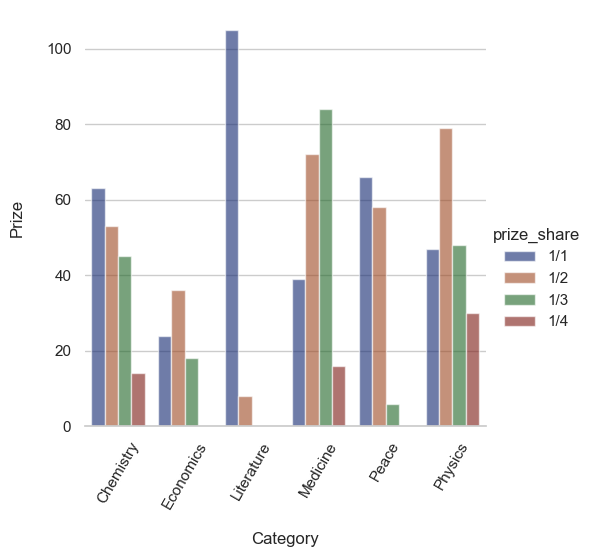

In [14]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_ilk, kind="bar",
    x="category", y="prize", hue="prize_share",
    palette="dark", alpha=0.6, height=5)
g.despine(left=True)
g.set_axis_labels("Category", "Prize", labelpad=15)
plt.title("", pad=20)
plt.xticks(rotation=60)

## 3) Ödül kazananların cinsiyetine göre

In [17]:
df_cinsiyet=df.groupby('sex')['prize'].count().reset_index(name='prize_count')
df_cinsiyet

,sex,prize_count
0,Female,49
1,Male,836


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

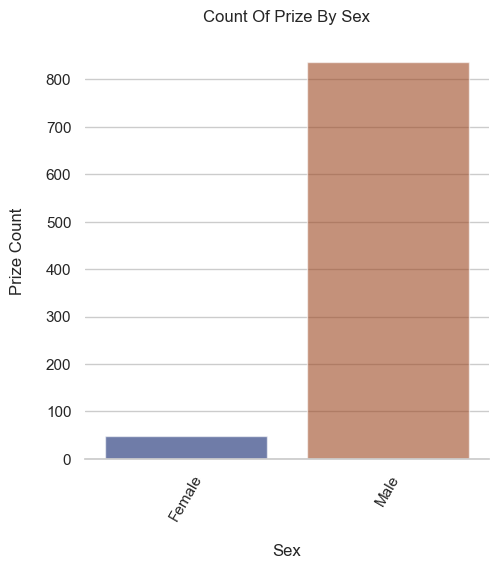

In [18]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_cinsiyet, kind="bar",
    x="sex", y="prize_count",
    palette="dark", alpha=0.6, height=5)
g.despine(left=True)
g.set_axis_labels("Sex", "Prize Count", labelpad=15)
plt.title("Count Of Prize By Sex", pad=15)
plt.xticks(rotation=60)

## 3) Ödüllerin yıllara göre dağılımı

In [19]:
df_yıllar=df.groupby('year_category')['prize'].count().reset_index()
df_yıllar

,year_category,prize
0,1900s,57
1,1910s,40
2,1920s,54
3,1930s,56
4,1940s,43
5,1950s,72
6,1960s,79
7,1970s,104
8,1980s,97
9,1990s,104


C:\Users\Sema Meydan\AppData\Local\Temp\ipykernel_13736\833639452.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_yıllar, x='year_category', y='prize', linewidth=2, palette='dark')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '1900s'),
  Text(1, 0, '1910s'),
  Text(2, 0, '1920s'),
  Text(3, 0, '1930s'),
  Text(4, 0, '1940s'),
  Text(5, 0, '1950s'),
  Text(6, 0, '1960s'),
  Text(7, 0, '1970s'),
  Text(8, 0, '1980s'),
  Text(9, 0, '1990s'),
  Text(10, 0, '2000s'),
  Text(11, 0, '2010s')])

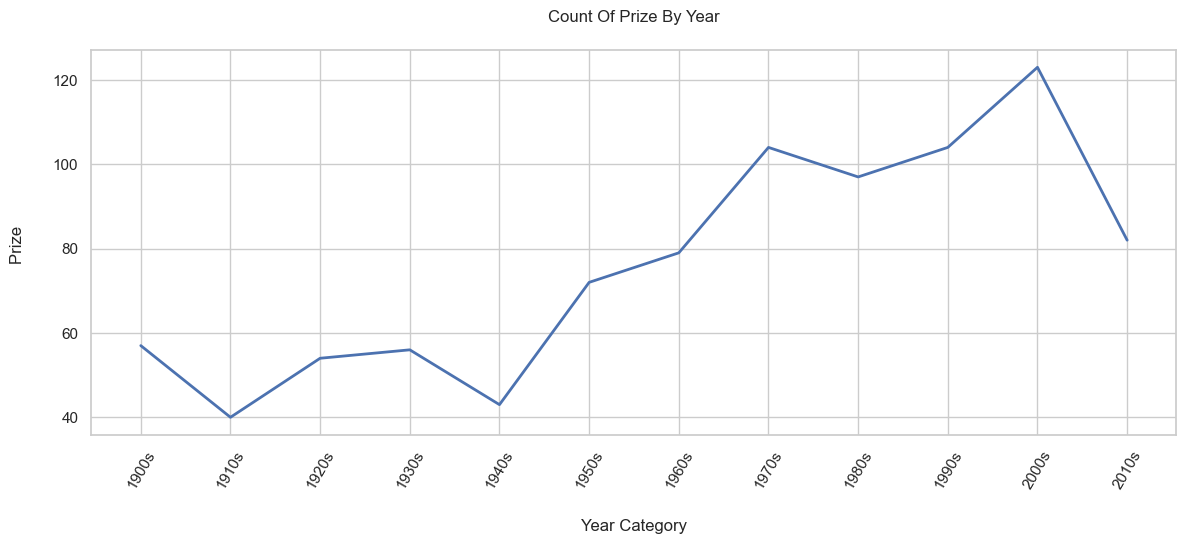

In [20]:
plt.rcParams['figure.figsize']=(14,5)
sns.set_style("whitegrid")
sns.lineplot(data=df_yıllar, x='year_category', y='prize', linewidth=2, palette='dark')
plt.xlabel('Year Category', labelpad=20)  
plt.ylabel("Prize ", labelpad=20)
plt.title('Count Of Prize By Year', pad=20)
plt.xticks(rotation=60)

## SORULAR

## SORU1: Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.

In [21]:
df2=df.groupby('organization_country')['prize'].count().sort_values(ascending=False).head(10).reset_index(name='Prize_Count')
df2

,organization_country,Prize_Count
0,USA,341
1,UK,89
2,Germany,43
3,France,36
4,Federal Republic of Germany,23
5,Switzerland,21
6,Sweden,17
7,Japan,16
8,Netherlands,11
9,Union of Soviet Socialist Republics,9


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400')])

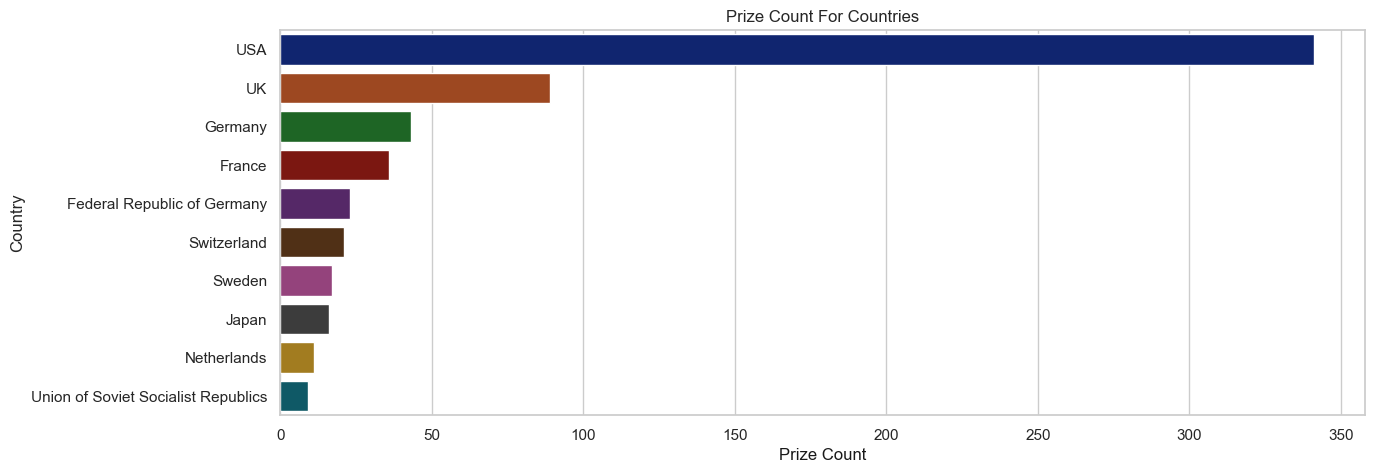

In [22]:
sns.barplot(x='Prize_Count', y='organization_country', data=df2, palette="dark")
plt.xlabel('Prize Count', color='black', alpha=0.9)
plt.ylabel('Country')
plt.title('Prize Count For Countries')
plt.xticks(rotation=0)

## SORU2: Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.

In [23]:
first_female_winner=df[df['sex']=='Female'][['full_name','category']].head(10).reset_index().set_index('index')
first_female_winner

,full_name,category
index,,
19,"Marie Curie, née Sklodowska",Physics
29,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace
51,Selma Ottilia Lovisa Lagerlöf,Literature
62,"Marie Curie, née Sklodowska",Chemistry
128,Grazia Deledda,Literature
141,Sigrid Undset,Literature
160,Jane Addams,Peace
179,Irène Joliot-Curie,Chemistry
198,Pearl Buck,Literature


In [24]:
df_women=df[df['sex']=='Female'][['full_name','category']]

In [25]:
df_women_first=df_women.drop_duplicates(subset='category')
df_women_first

,full_name,category
19,"Marie Curie, née Sklodowska",Physics
29,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace
51,Selma Ottilia Lovisa Lagerlöf,Literature
62,"Marie Curie, née Sklodowska",Chemistry
235,"Gerty Theresa Cori, née Radnitz",Medicine
819,Elinor Ostrom,Economics


## SORU3: Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.

In [26]:
first_male_winner=df[df['sex']=='Male'][['full_name','category']].head(10).reset_index().set_index('index')
first_male_winner

,full_name,category
index,,
0,Jacobus Henricus van 't Hoff,Chemistry
1,Sully Prudhomme,Literature
2,Emil Adolf von Behring,Medicine
3,Jean Henry Dunant,Peace
4,Frédéric Passy,Peace
5,Wilhelm Conrad Röntgen,Physics
6,Hermann Emil Fischer,Chemistry
7,Christian Matthias Theodor Mommsen,Literature
8,Ronald Ross,Medicine


In [27]:
df_men=df[df['sex']=='Male'][['full_name','category']]

In [28]:
first_df_men=df_men.drop_duplicates(subset='category')
first_df_men

,full_name,category
0,Jacobus Henricus van 't Hoff,Chemistry
1,Sully Prudhomme,Literature
2,Emil Adolf von Behring,Medicine
3,Jean Henry Dunant,Peace
5,Wilhelm Conrad Röntgen,Physics
393,Ragnar Frisch,Economics


## SORU4: Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?

In [29]:
df_usa=df[df['organization_country']=='USA']
df_usa

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,year_category
42,1907-01-01,Physics,The Nobel Prize in Physics 1907,"""for his optical precision instruments and the...",1/1,11,Individual,Albert Abraham Michelson,1852-12-19,Strelno (Strzelno),Poland,Male,University of Chicago,"Chicago, IL",USA,1931-05-09,"Pasadena, CA",United States of America,1900s
71,1912-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1912,"""in recognition of his work on vascular suture...",1/1,306,Individual,Alexis Carrel,1873-06-28,Sainte-Foy-lès-Lyon,France,Male,Rockefeller Institute for Medical Research,"New York, NY",USA,1944-11-05,Paris,France,1910s
79,1914-01-01,Chemistry,The Nobel Prize in Chemistry 1914,"""in recognition of his accurate determinations...",1/1,175,Individual,Theodore William Richards,1868-01-31,"Germantown, PA",USA,Male,Harvard University,"Cambridge, MA",USA,1928-04-02,"Cambridge, MA",United States of America,1910s
117,1923-01-01,Physics,The Nobel Prize in Physics 1923,"""for his work on the elementary charge of elec...",1/1,28,Individual,Robert Andrews Millikan,1868-03-22,"Morrison, IL",USA,Male,California Institute of Technology (Caltech),"Pasadena, CA",USA,1953-12-19,"San Marino, CA",United States of America,1920s
138,1927-01-01,Physics,The Nobel Prize in Physics 1927,"""for his discovery of the effect named after him""",1/2,33,Individual,Arthur Holly Compton,1892-09-10,"Wooster, OH",USA,Male,University of Chicago,"Chicago, IL",USA,1962-03-15,"Berkeley, CA",United States of America,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,2016-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their contributions to contract theory""",1/2,935,Individual,Oliver Hart,1948-10-09,London,UK,Male,Harvard University,"Cambridge, MA",USA,NaT,NaN,NaN,2010s
904,2016-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their contributions to contract theory""",1/2,936,Individual,Bengt Holmström,1949-04-18,Helsinki,Finland,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",USA,NaT,NaN,NaN,2010s
908,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,UK,Male,University of Washington,"Seattle, WA",USA,NaT,NaN,NaN,2010s
909,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,UK,Male,Princeton University,"Princeton, NJ",USA,NaT,NaN,NaN,2010s


In [30]:
df_usa_prize=df_usa.groupby('year_category')['prize'].count().reset_index(name='nobel_prize_count')
df_usa_prize

,year_category,nobel_prize_count
0,1900s,1
1,1910s,2
2,1920s,2
3,1930s,11
4,1940s,14
5,1950s,31
6,1960s,29
7,1970s,44
8,1980s,46
9,1990s,58


In [31]:
df_genel_prize=df.groupby('year_category')['prize'].count().reset_index(name='nobel_prize_count')
df_genel_prize

,year_category,nobel_prize_count
0,1900s,57
1,1910s,40
2,1920s,54
3,1930s,56
4,1940s,43
5,1950s,72
6,1960s,79
7,1970s,104
8,1980s,97
9,1990s,104


In [32]:
birlestirme_df = pd.merge(df_usa_prize, df_genel_prize, on='year_category', suffixes=('_usa', '_genel'))
birlestirme_df

,year_category,nobel_prize_count_usa,nobel_prize_count_genel
0,1900s,1,57
1,1910s,2,40
2,1920s,2,54
3,1930s,11,56
4,1940s,14,43
5,1950s,31,72
6,1960s,29,79
7,1970s,44,104
8,1980s,46,97
9,1990s,58,104


In [33]:
birlestirme_df['usa_genel_oran'] = (birlestirme_df['nobel_prize_count_usa'] / birlestirme_df['nobel_prize_count_genel']*100).round(2)
birlestirme_df

,year_category,nobel_prize_count_usa,nobel_prize_count_genel,usa_genel_oran
0,1900s,1,57,1.75
1,1910s,2,40,5.00
2,1920s,2,54,3.70
3,1930s,11,56,19.64
4,1940s,14,43,32.56
5,1950s,31,72,43.06
6,1960s,29,79,36.71
7,1970s,44,104,42.31
8,1980s,46,97,47.42
9,1990s,58,104,55.77


C:\Users\Sema Meydan\AppData\Local\Temp\ipykernel_13736\2097745427.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=birlestirme_df, x='year_category', y='usa_genel_oran', linewidth=2, palette='dark')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '1900s'),
  Text(1, 0, '1910s'),
  Text(2, 0, '1920s'),
  Text(3, 0, '1930s'),
  Text(4, 0, '1940s'),
  Text(5, 0, '1950s'),
  Text(6, 0, '1960s'),
  Text(7, 0, '1970s'),
  Text(8, 0, '1980s'),
  Text(9, 0, '1990s'),
  Text(10, 0, '2000s'),
  Text(11, 0, '2010s')])

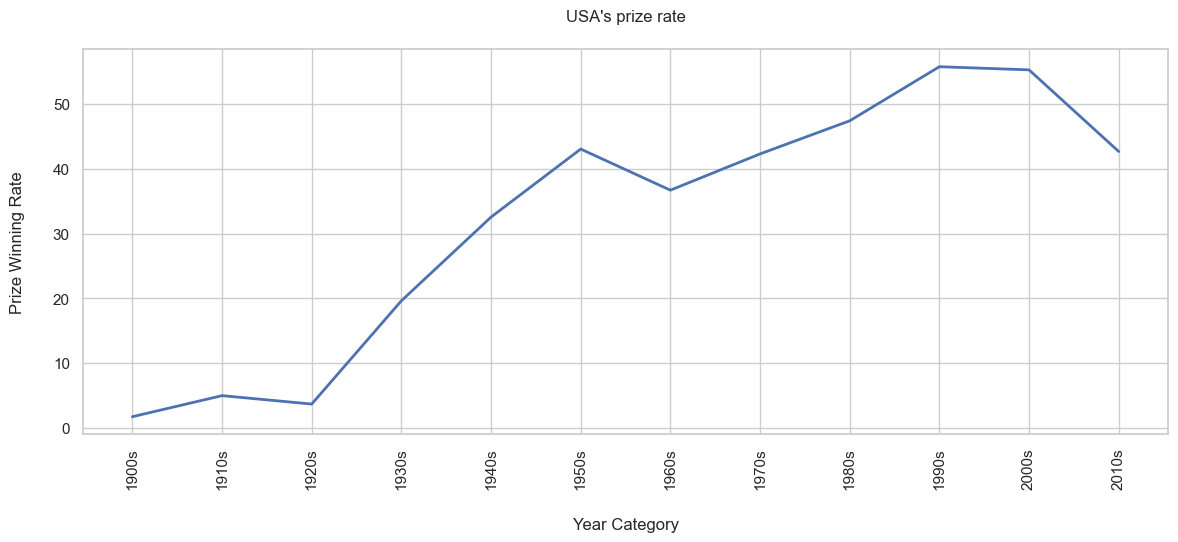

In [34]:
plt.rcParams['figure.figsize']=(14,5)
sns.set_style("whitegrid")
sns.lineplot(data=birlestirme_df, x='year_category', y='usa_genel_oran', linewidth=2, palette='dark')
plt.xlabel('Year Category', labelpad=20)  
plt.ylabel("Prize Winning Rate", labelpad=20)
plt.title("USA's prize rate", pad=20)
plt.xticks(rotation=90)



ABD'nin Nobel ödüllerinde kazandığı ödüllerin oranına baktığımızda 1920'li yıllarda sonra yükselişe geçtiğini görebiliriz. Birinci Dünya savaşı ile beraber dünya siyasi tarihinde güç kazanan ABD'nin kendi içersinde bilimsel alanlara da yatırım yapmaya başladığını söyleyebiliriz.Özellikle bu oranın 1950'lerden itibaren %40'ların üzerinde çıktığını görüyoruz. İkinci Dünya savaşından sonra ekonomik ve siyasal anlamda güçlenmesinin ve soğuk savaş etkisiyle SSCB ile olan rekabetinin birçok alana yansımasıyla bilimsel çalışmaların gelişmesine olanak sağladığını, bütçe ve zaman ayırdığını söyleyebiliriz.

## SORU5: Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.

In [35]:
df['age']=((df['year']-df['birth_date']).dt.days /365).round(0)

In [36]:
df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,year_category,age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900s,48.0
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900s,62.0
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900s,47.0
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900s,73.0
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900s,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaT,NaN,NaN,2010s,71.0
907,2016-01-01,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaT,NaN,NaN,2010s,64.0
908,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,UK,Male,University of Washington,"Seattle, WA",USA,NaT,NaN,NaN,2010s,81.0
909,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,UK,Male,Princeton University,"Princeton, NJ",USA,NaT,NaN,NaN,2010s,64.0


## 1) Kimya

In [37]:
df_chemistry=df[df['category']=='Chemistry']

In [38]:
df_ch_kategori=df_chemistry.groupby('sex').agg(prize_count=('full_name', 'count'),average_age=('age', 'mean')).round().reset_index()
df_ch_kategori

,sex,prize_count,average_age
0,Female,4,51.0
1,Male,171,58.0


Text(0.5, 1.0, 'Nobel Prize Of Chemistry')

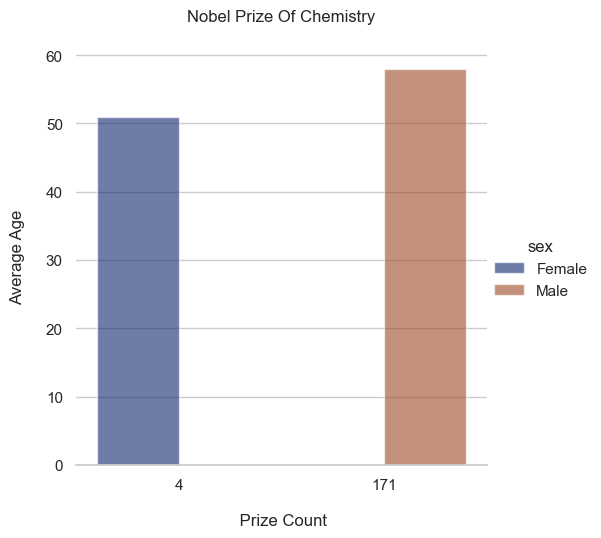

In [39]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_ch_kategori, kind="bar",
    x="prize_count", y="average_age", hue="sex",
    palette="dark", alpha=0.6, height=5)
g.despine(left=True)
g.set_axis_labels(" Prize Count", "Average Age", labelpad=15)
plt.title("Nobel Prize Of Chemistry", pad=20)


Nobel ödüllerinde Kimya dalında toplamda 175 ödül verilmiştir. Bu ödüllerin sahiplerinin dördünün kadın olduğu geri kalanların ise erkek olduğunu grafikte görebiliyoruz. cinsiyete göre yaş ortalamalarının dağılımına bakacak olursak, kadınlarda 51 iken erkeklerde 58 dir.

In [40]:
df[df['category']=='Chemistry']
df_che2=df_chemistry.groupby('year_category')['category'].count().reset_index(name='chemistry_prize_count')
df_che2

,year_category,chemistry_prize_count
0,1900s,9
1,1910s,8
2,1920s,10
3,1930s,13
4,1940s,9
5,1950s,14
6,1960s,15
7,1970s,15
8,1980s,21
9,1990s,18


C:\Users\Sema Meydan\AppData\Local\Temp\ipykernel_13736\2554818854.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="year_category", y="chemistry_prize_count",
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Chemistry')

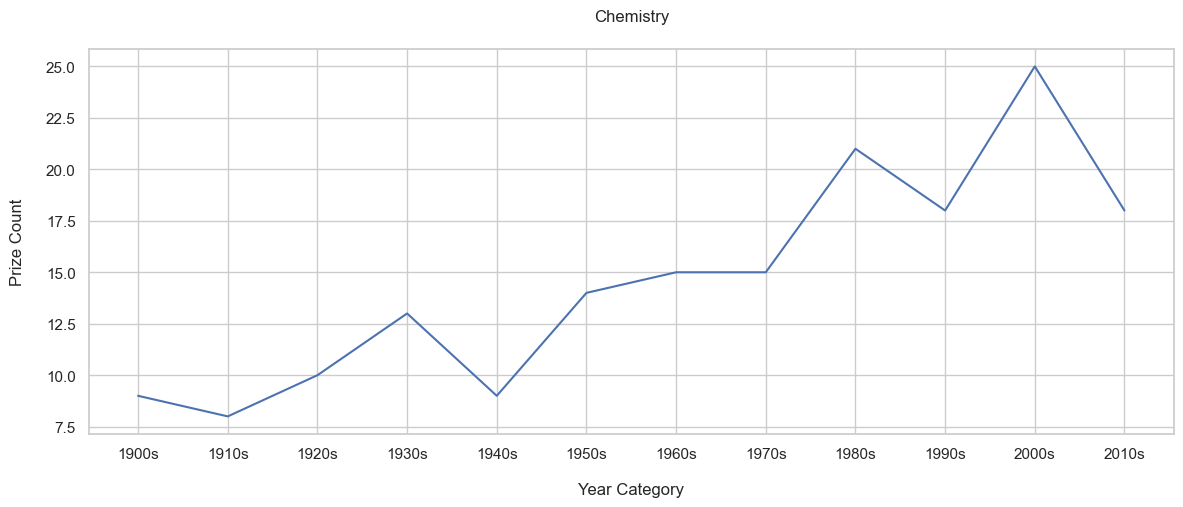

In [41]:
sns.set_style("whitegrid")
sns.lineplot(x="year_category", y="chemistry_prize_count",
            data=df_che2, palette="dark")
plt.xlabel("Year Category", labelpad=15)
plt.ylabel("Prize Count", labelpad=15)
plt.title('Chemistry', pad=20)

Yıllara göre dağılımına bakacak olursak 1940'lı yıllardan sonra kimya alanında çalışmaların arttığını ve bu çalışmaların ödül sayılarına yansıdığını görebiliriz.

## 2)Edebiyat

In [42]:
df_literature=df[df['category']=='Literature']
df_literature

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,year_category,age
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900s,62.0
7,1902-01-01,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Germany,Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany,1900s,84.0
14,1903-01-01,Literature,The Nobel Prize in Literature 1903,"""as a tribute to his noble, magnificent and ve...",1/1,572,Individual,Bjørnstjerne Martinus Bjørnson,1832-12-08,Kvikne,Norway,Male,NaN,NaN,NaN,1910-04-26,Paris,France,1900s,70.0
21,1904-01-01,Literature,The Nobel Prize in Literature 1904,"""in recognition of the fresh originality and t...",1/2,573,Individual,Frédéric Mistral,1830-09-08,Maillane,France,Male,NaN,NaN,NaN,1914-03-25,Maillane,France,1900s,73.0
22,1904-01-01,Literature,The Nobel Prize in Literature 1904,"""in recognition of the numerous and brilliant ...",1/2,574,Individual,José Echegaray y Eizaguirre,1832-04-19,Madrid,Spain,Male,NaN,NaN,NaN,1916-09-04,Madrid,Spain,1900s,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,2012-01-01,Literature,The Nobel Prize in Literature 2012,"""who with hallucinatory realism merges folk ta...",1/1,880,Individual,Mo Yan,1955-02-02,Gaomi,China,Male,NaN,NaN,NaN,NaT,NaN,NaN,2010s,57.0
869,2013-01-01,Literature,The Nobel Prize in Literature 2013,"""master of the contemporary short story""",1/1,892,Individual,Alice Munro,1931-07-10,Wingham,Canada,Female,NaN,NaN,NaN,NaT,NaN,NaN,2010s,82.0
880,2014-01-01,Literature,The Nobel Prize in Literature 2014,"""for the art of memory with which he has evoke...",1/1,912,Individual,Patrick Modiano,1945-07-30,Paris,France,Male,NaN,NaN,NaN,NaT,NaN,NaN,2010s,68.0
893,2015-01-01,Literature,The Nobel Prize in Literature 2015,"""for her polyphonic writings, a monument to su...",1/1,924,Individual,Svetlana Alexievich,1948-05-31,Ivano-Frankivsk,Ukraine,Female,NaN,NaN,NaN,NaT,NaN,NaN,2010s,67.0


In [43]:
df_lit_kat=df_literature.groupby('sex').agg(prize_count=('full_name', 'count'),average_age=('age', 'mean')).round().reset_index()
df_lit_kat

,sex,prize_count,average_age
0,Female,14,63.0
1,Male,99,64.0


Text(0.5, 1.0, 'Nobel Prize Of Literature')

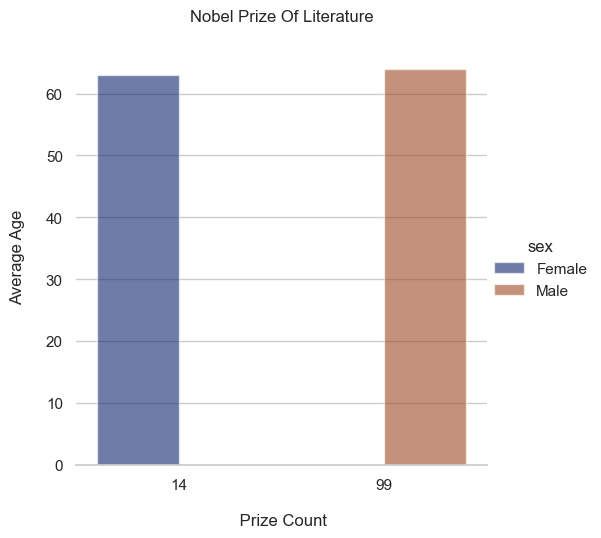

In [44]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_lit_kat, kind="bar",
    x="prize_count", y="average_age", hue="sex",
    palette="dark", alpha=.6, height=5)
g.despine(left=True)
g.set_axis_labels(" Prize Count", "Average Age", labelpad=15)
plt.title("Nobel Prize Of Literature", pad=20)


Nobel ödüllerinde Edebiyat dalında toplamda 113 ödül verilmiştir. Bu ödüllerin sahiplerinin ondördünün kadın olduğu geri kalanların ise erkek olduğunu grafikte görebiliyoruz.Cinsiyete göre yaş ortalamalarının dağılımına bakacak olursak, kadınlarda 63 iken erkeklerde 64 dür. Aynı zamanda edebiyat kategorsi Nobel'de kadınların en çok ödül aldığı iki daldan biridir.

In [45]:
df_lit=df_literature.groupby('year_category')['category'].count().reset_index(name='literature_prize_count')
df_lit

,year_category,literature_prize_count
0,1900s,10
1,1910s,9
2,1920s,10
3,1930s,9
4,1940s,6
5,1950s,10
6,1960s,11
7,1970s,11
8,1980s,10
9,1990s,10


C:\Users\Sema Meydan\AppData\Local\Temp\ipykernel_13736\1202800918.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="year_category", y="literature_prize_count",
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Literature')

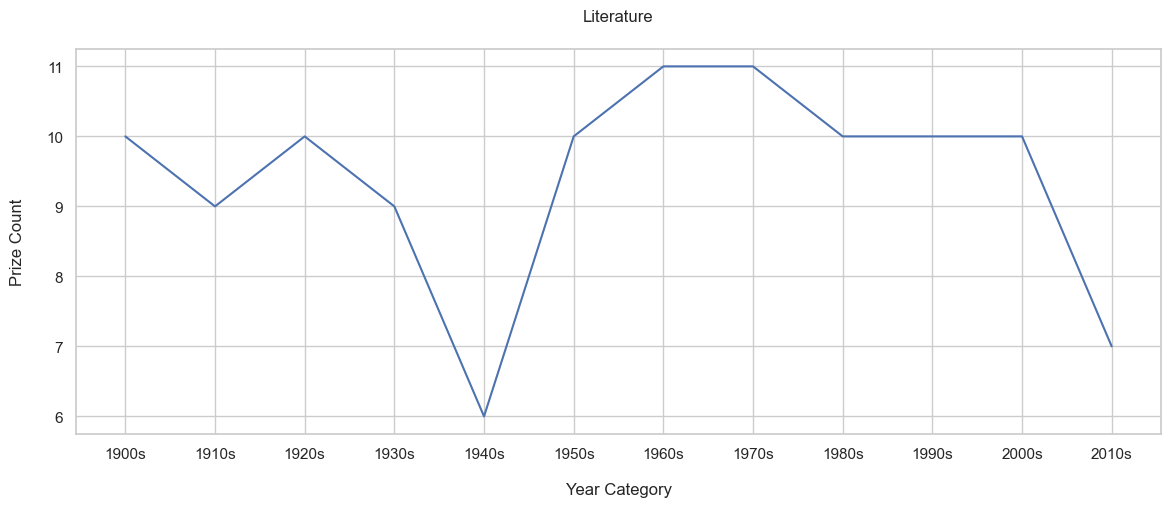

In [46]:
sns.set_style("whitegrid")
sns.lineplot(x="year_category", y="literature_prize_count",
            data=df_lit, palette="dark")
plt.xlabel("Year Category", labelpad=15)
plt.ylabel("Prize Count", labelpad=15)
plt.title('Literature', pad=20)

Yıllara göre dağılımına bakacak olursak 1930 - 1940 yılları arasında bir düşüş yaşadığını bu dönemin de İkinci Dünya savaşı dönemine denk geldiği için etkilendiğini söyleyebiliriz.

## 3) Fizik

In [47]:
df_physics=df[df['category']=='Physics']
df_physics

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,year_category,age
5,1901-01-01,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Germany,Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany,1900s,56.0
11,1902-01-01,Physics,The Nobel Prize in Physics 1902,"""in recognition of the extraordinary service t...",1/2,2,Individual,Hendrik Antoon Lorentz,1853-07-18,Arnhem,Netherlands,Male,Leiden University,Leiden,Netherlands,1928-02-04,NaN,Netherlands,1900s,48.0
12,1902-01-01,Physics,The Nobel Prize in Physics 1902,"""in recognition of the extraordinary service t...",1/2,3,Individual,Pieter Zeeman,1865-05-25,Zonnemaire,Netherlands,Male,Amsterdam University,Amsterdam,Netherlands,1943-10-09,Amsterdam,Netherlands,1900s,37.0
17,1903-01-01,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/2,4,Individual,Antoine Henri Becquerel,1852-12-15,Paris,France,Male,École Polytechnique,Paris,France,1908-08-25,NaN,France,1900s,50.0
18,1903-01-01,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,5,Individual,Pierre Curie,1859-05-15,Paris,France,Male,École municipale de physique et de chimie indu...,Paris,France,1906-04-19,Paris,France,1900s,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,2015-01-01,Physics,The Nobel Prize in Physics 2015,"""for the discovery of neutrino oscillations, w...",1/2,919,Individual,Takaaki Kajita,1959-03-09,Higashimatsuyama,Japan,Male,University of Tokyo,Kashiwa,Japan,NaT,NaN,NaN,2010s,56.0
899,2015-01-01,Physics,The Nobel Prize in Physics 2015,"""for the discovery of neutrino oscillations, w...",1/2,920,Individual,Arthur B. McDonald,1943-08-29,Sydney,Canada,Male,Queen's University,Kingston,Canada,NaT,NaN,NaN,2010s,71.0
908,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,UK,Male,University of Washington,"Seattle, WA",USA,NaT,NaN,NaN,2010s,81.0
909,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,UK,Male,Princeton University,"Princeton, NJ",USA,NaT,NaN,NaN,2010s,64.0


In [48]:
df_ph_kat=df_physics.groupby('sex').agg(prize_count=('full_name', 'count'),average_age=('age', 'mean')).round().reset_index()
df_ph_kat

,sex,prize_count,average_age
0,Female,2,46.0
1,Male,202,55.0


Text(0.5, 1.0, 'Nobel Prize Of Physics')

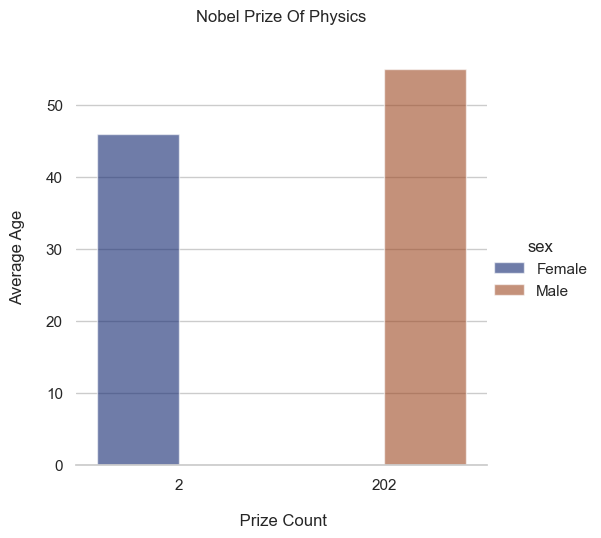

In [49]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_ph_kat, kind="bar",
    x="prize_count", y="average_age", hue="sex",
    palette="dark", alpha=.6, height=5)
g.despine(left=True)
g.set_axis_labels(" Prize Count", "Average Age", labelpad=15)
plt.title("Nobel Prize Of Physics", pad=20)

Nobel ödüllerinde Fizik dalında toplamda 204 ödül verilmiştir. Bu ödüllerin sahiplerinin ikisinin kadın olduğu geri kalanların ise erkek olduğunu grafikte görebiliyoruz.Cinsiyete göre yaş ortalamalarının dağılımına bakacak olursak, kadınlarda 46 iken erkeklerde 55 dir.

In [50]:
df_ph_kat2=df_physics.groupby('year_category')['category'].count().reset_index(name='physics_prize_count')
df_ph_kat2

,year_category,physics_prize_count
0,1900s,13
1,1910s,10
2,1920s,12
3,1930s,11
4,1940s,7
5,1950s,20
6,1960s,17
7,1970s,25
8,1980s,22
9,1990s,22


C:\Users\Sema Meydan\AppData\Local\Temp\ipykernel_13736\2969287090.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="year_category", y="physics_prize_count",
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Physics')

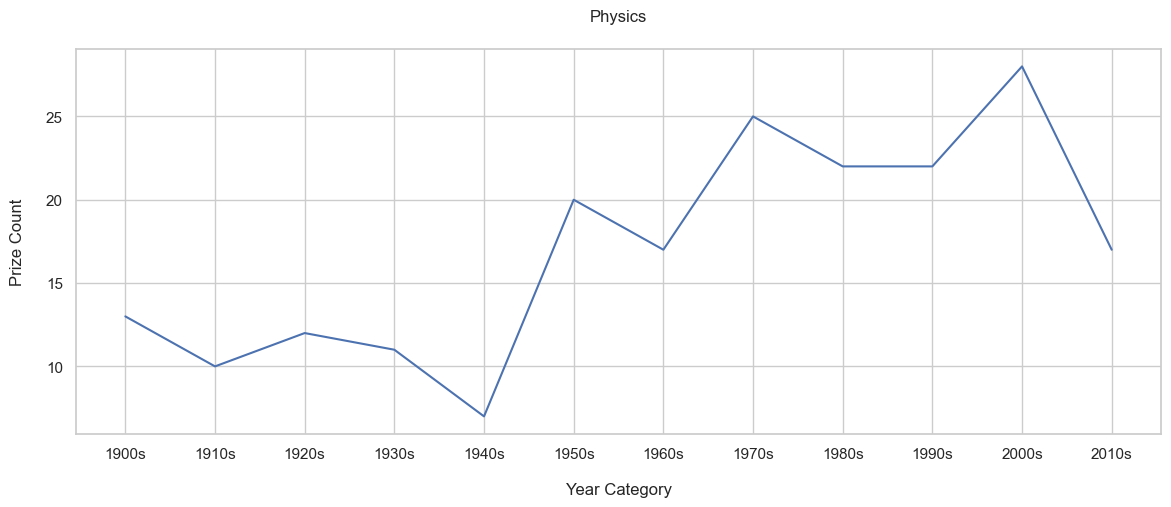

In [51]:
sns.set_style("whitegrid")
sns.lineplot(x="year_category", y="physics_prize_count",
            data=df_ph_kat2, palette="dark")
plt.xlabel("Year Category", labelpad=15)
plt.ylabel("Prize Count", labelpad=15)
plt.title('Physics', pad=20)

Yıllara göre dağılımına bakacak olursak 1940'lı yıllardan sonra çalışmaların arttığını ve ödüllere de bunun yansıdığını söyleyebiliriz

## 4) Barış

In [52]:
df_peace=df[df['category']=='Peace']
df_peace

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,year_category,age
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900s,73.0
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900s,79.0
9,1902-01-01,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland,1900s,69.0
10,1902-01-01,Peace,The Nobel Peace Prize 1902,NaN,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland,1900s,59.0
16,1903-01-01,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,UK,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom,1900s,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,2013-01-01,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,893,Organization,Organisation for the Prohibition of Chemical W...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,2010s,NaN
884,2014-01-01,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,913,Individual,Kailash Satyarthi,1954-01-11,Vidisha,India,Male,NaN,NaN,NaN,NaT,NaN,NaN,2010s,60.0
885,2014-01-01,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaT,NaN,NaN,2010s,16.0
897,2015-01-01,Peace,The Nobel Peace Prize 2015,"""for its decisive contribution to the building...",1/1,925,Organization,National Dialogue Quartet,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,2010s,NaN


In [53]:
df_pea_kat=df_peace.groupby('sex').agg(prize_count=('full_name', 'count'),average_age=('age', 'mean')).round().reset_index()
df_pea_kat

,sex,prize_count,average_age
0,Female,16,52.0
1,Male,88,63.0


Text(0.5, 1.0, 'Nobel Prize Of Peace')

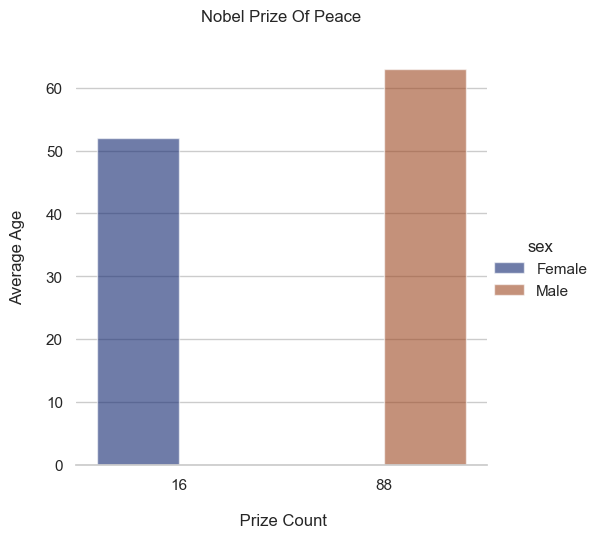

In [54]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_pea_kat, kind="bar",
    x="prize_count", y="average_age", hue="sex",
    palette="dark", alpha=.6, height=5)
g.despine(left=True)
g.set_axis_labels(" Prize Count", "Average Age", labelpad=15)
plt.title("Nobel Prize Of Peace", pad=20)

Nobel ödüllerinde Barış dalında toplamda 104 ödül verilmiştir. Bu ödüllerin sahiplerinin onaltısının kadın olduğu geri kalanların ise erkek olduğunu grafikte görebiliyoruz. Cinsiyete göre yaş ortalamalarının dağılımına bakacak olursak, kadınlarda 52 iken erkeklerde 63 dür.

In [55]:
df_pea_kat2=df_peace.groupby('year_category')['category'].count().reset_index(name='peace_prize_count')
df_pea_kat2

,year_category,peace_prize_count
0,1900s,14
1,1910s,7
2,1920s,11
3,1930s,9
4,1940s,7
5,1950s,8
6,1960s,9
7,1970s,13
8,1980s,11
9,1990s,17


C:\Users\Sema Meydan\AppData\Local\Temp\ipykernel_13736\3142131447.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="year_category", y="peace_prize_count",
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Peace')

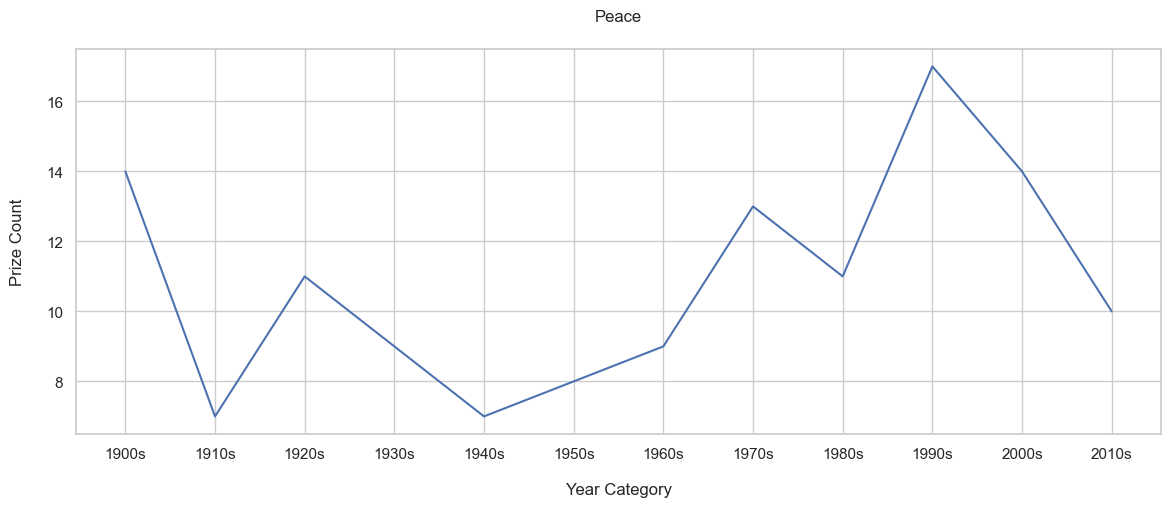

In [56]:
sns.set_style("whitegrid")
sns.lineplot(x="year_category", y="peace_prize_count",
            data=df_pea_kat2, palette="dark")
plt.xlabel("Year Category", labelpad=15)
plt.ylabel("Prize Count", labelpad=15)
plt.title('Peace', pad=20)

Yıllara göre dağılımına bakacak olursak Birinci ve İkinci Dünya savaşlarından sonra barış ödülleriniin sayısında ivmelenmelerin olduğunu görebiliriz.

## 5) Tıp

In [57]:
df_medicine=df[df['category']=='Medicine']
df_medicine

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,year_category,age
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900s,47.0
8,1902-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,UK,1932-09-16,Putney Heath,United Kingdom,1900s,45.0
15,1903-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1903,"""in recognition of his contribution to the tre...",1/1,295,Individual,Niels Ryberg Finsen,1860-12-15,Thorshavn,Faroe Islands,Male,Finsen Medical Light Institute,Copenhagen,Denmark,1904-09-24,Copenhagen,Denmark,1900s,42.0
23,1904-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1904,"""in recognition of his work on the physiology ...",1/1,296,Individual,Ivan Petrovich Pavlov,1849-09-14,Ryazan,Russia,Male,Military Medical Academy,St. Petersburg,Russia,1936-02-27,Leningrad,Russia,1900s,54.0
28,1905-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1905,"""for his investigations and discoveries in rel...",1/1,297,Individual,Robert Koch,1843-12-11,Clausthal (Clausthal-Zellerfeld),Germany,Male,Institute for Infectious Diseases,Berlin,Germany,1910-05-27,Baden-Baden,Germany,1900s,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2014-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2014,"""for their discoveries of cells that constitut...",1/4,905,Individual,Edvard I. Moser,1962-04-27,Ålesund,Norway,Male,Norwegian University of Science and Technology...,Trondheim,Norway,NaT,NaN,NaN,2010s,52.0
894,2015-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2015,"""for their discoveries concerning a novel ther...",1/4,916,Individual,William C. Campbell,1930-06-28,Ramelton,Ireland,Male,Drew University,"Madison, NJ",USA,NaT,NaN,NaN,2010s,85.0
895,2015-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2015,"""for their discoveries concerning a novel ther...",1/4,917,Individual,Satoshi Ōmura,1935-07-12,Yamanashi Prefecture,Japan,Male,Kitasato University,Tokyo,Japan,NaT,NaN,NaN,2010s,80.0
896,2015-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2015,"""for her discoveries concerning a novel therap...",1/2,918,Individual,Youyou Tu,1930-12-30,Zhejiang Ningbo,China,Female,China Academy of Traditional Chinese Medicine,Beijing,China,NaT,NaN,NaN,2010s,84.0


In [58]:
df_med_kat=df_medicine.groupby('sex').agg(prize_count=('full_name', 'count'),average_age=('age', 'mean')).round().reset_index()
df_med_kat

,sex,prize_count,average_age
0,Female,12,62.0
1,Male,199,57.0


Text(0.5, 1.0, 'Nobel Prize Of Medicine')

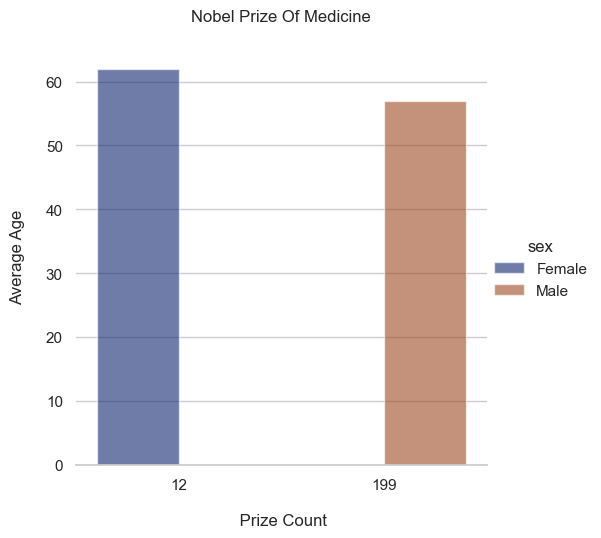

In [59]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_med_kat, kind="bar",
    x="prize_count", y="average_age", hue="sex",
    palette="dark", alpha=.6, height=5)
g.despine(left=True)
g.set_axis_labels(" Prize Count", "Average Age", labelpad=15)
plt.title("Nobel Prize Of Medicine", pad=20)

Nobel ödüllerinde Tıp dalında toplamda 211 ödül verilmiştir. Bu ödüllerin sahiplerinin onikisinin kadın olduğu geri kalanların ise erkek olduğunu grafikte görebiliyoruz.Cinsiyete göre yaş ortalamalarının dağılımına bakacak olursak, kadınlarda 62 iken erkeklerde 57 dir.

In [60]:
df_med_kat2=df_medicine.groupby('year_category')['category'].count().reset_index(name='medicine_prize_count')
df_med_kat2

,year_category,medicine_prize_count
0,1900s,11
1,1910s,6
2,1920s,11
3,1930s,14
4,1940s,14
5,1950s,20
6,1960s,25
7,1970s,25
8,1980s,23
9,1990s,20


C:\Users\Sema Meydan\AppData\Local\Temp\ipykernel_13736\2218965027.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="year_category", y="medicine_prize_count",
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Medicine')

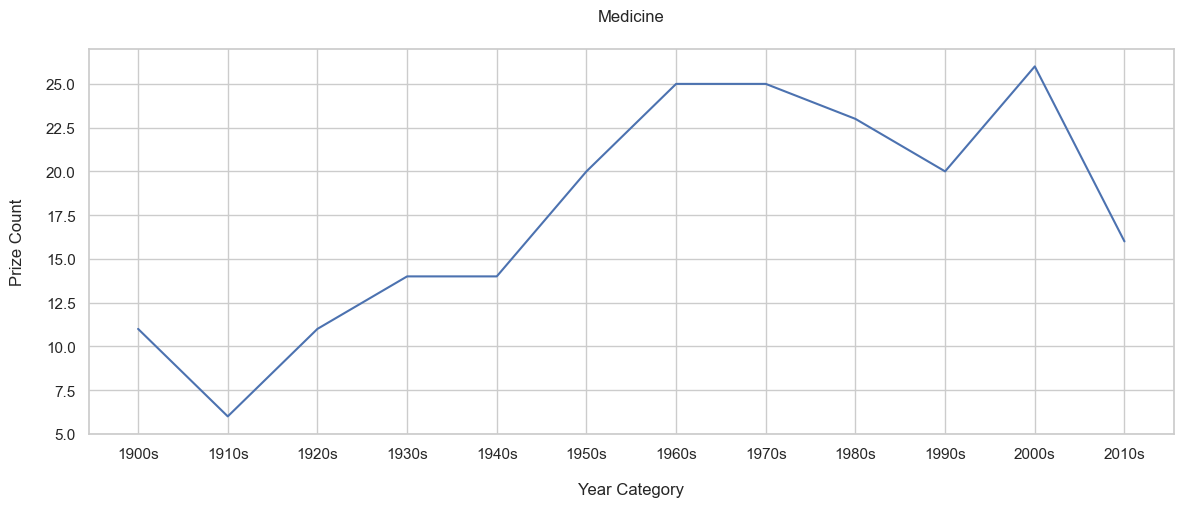

In [61]:
sns.set_style("whitegrid")
sns.lineplot(x="year_category", y="medicine_prize_count",
            data=df_med_kat2, palette="dark")
plt.xlabel("Year Category", labelpad=15)
plt.ylabel("Prize Count", labelpad=15)
plt.title('Medicine', pad=20)

Yıllara göre bakacak olursak 1910'lu yıllardan sonra artışın başladığını, 1940 ve 1960 arasında neredeyse iki katına çıktığını görebiliriz.

## 6) Ekonomi

In [62]:
df_economics=df[df['category']=='Economics']
df_economics

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,year_category,age
393,1969-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,677,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Male,University of Oslo,Oslo,Norway,1973-01-31,Oslo,Norway,1960s,74.0
394,1969-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,678,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,1994-06-09,the Hague,Netherlands,1960s,66.0
402,1970-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,679,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",USA,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",USA,2009-12-13,"Belmont, MA",United States of America,1970s,55.0
411,1971-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,680,Individual,Simon Kuznets,1901-04-30,Pinsk,Belarus,Male,Harvard University,"Cambridge, MA",USA,1985-07-08,"Cambridge, MA",United States of America,1970s,70.0
419,1972-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,681,Individual,John R. Hicks,1904-04-08,Warwick,UK,Male,All Souls College,Oxford,UK,1989-05-20,Blockley,United Kingdom,1970s,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,2013-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their empirical analysis of asset prices""",1/3,896,Individual,Robert J. Shiller,1946-03-29,"Detroit, MI",USA,Male,Yale University,"New Haven, CT",USA,NaT,NaN,NaN,2010s,67.0
879,2014-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his analysis of market power and regulation""",1/1,915,Individual,Jean Tirole,1953-08-09,Troyes,France,Male,Toulouse School of Economics (TSE),Toulouse,France,NaT,NaN,NaN,2010s,60.0
892,2015-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his analysis of consumption, poverty, and...",1/1,926,Individual,Angus Deaton,1945-10-19,Edinburgh,UK,Male,Princeton University,"Princeton, NJ",USA,NaT,NaN,NaN,2010s,69.0
903,2016-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their contributions to contract theory""",1/2,935,Individual,Oliver Hart,1948-10-09,London,UK,Male,Harvard University,"Cambridge, MA",USA,NaT,NaN,NaN,2010s,67.0


In [63]:
df_eco_kat=df_economics.groupby('sex').agg(prize_count=('full_name', 'count'),average_age=('age', 'mean')).round().reset_index()
df_eco_kat

,sex,prize_count,average_age
0,Female,1,75.0
1,Male,77,67.0


Text(0.5, 1.0, 'Nobel Prize Of Economics')

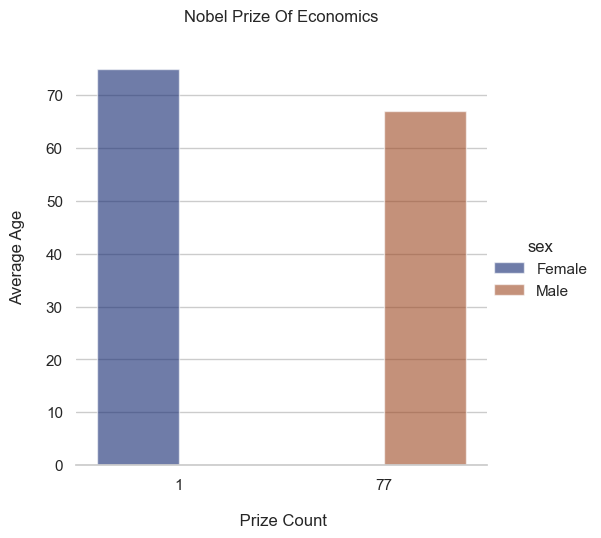

In [64]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_eco_kat, kind="bar",
    x="prize_count", y="average_age", hue="sex",
    palette="dark", alpha=.6, height=5)
g.despine(left=True)
g.set_axis_labels(" Prize Count", "Average Age", labelpad=15)
plt.title("Nobel Prize Of Economics", pad=20)

Nobel ödüllerinde Ekonomi dalında toplamda 78 ödül verilmiştir. Bu ödüllerin sahiplerinin birinin kadın olduğu geri kalanların ise erkek olduğunu grafikte görebiliyoruz.Cinsiyete göre yaş ortalamalarının dağılımına bakacak olursak, kadınlarda 75 iken erkeklerde 67 dir.

In [65]:
df_eco_kat2=df_economics.groupby('year_category')['category'].count().reset_index(name='economics_prize_count')
df_eco_kat2

,year_category,economics_prize_count
0,1960s,2
1,1970s,15
2,1980s,10
3,1990s,17
4,2000s,20
5,2010s,14


C:\Users\Sema Meydan\AppData\Local\Temp\ipykernel_13736\224508454.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="year_category", y="economics_prize_count",
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Economics')

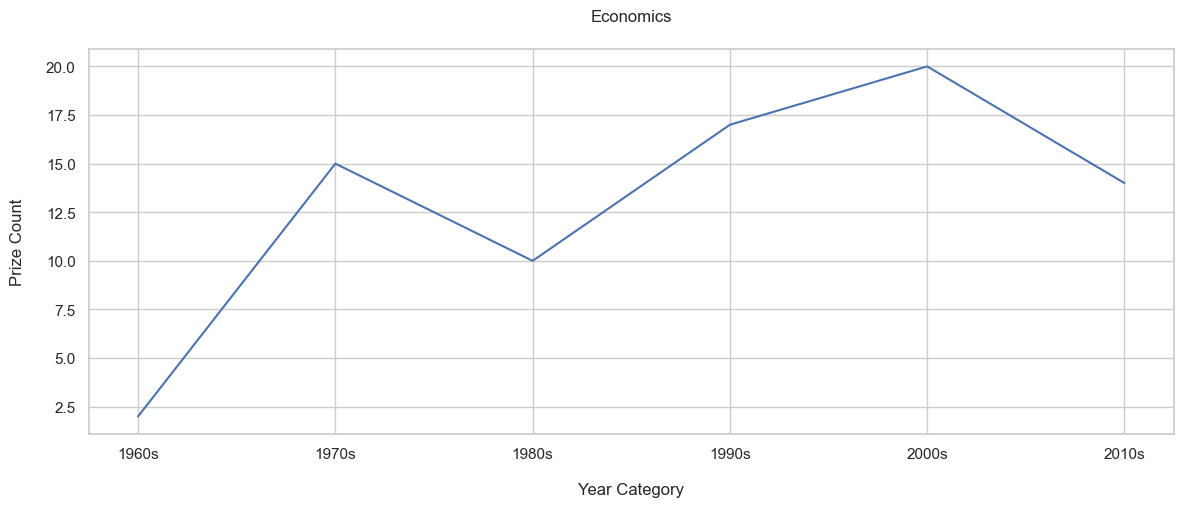

In [66]:
sns.set_style("whitegrid")
sns.lineplot(x="year_category", y="economics_prize_count",
            data=df_eco_kat2, palette="dark")
plt.xlabel("Year Category", labelpad=15)
plt.ylabel("Prize Count", labelpad=15)
plt.title('Economics', pad=20)

Yıllara göre dağılıma baktığımızda Ekonomi dalında ödüllerin 1960'lı yıllarda verilmeye başladığını dönem dönem iniş çıkışarın yaşandığı görülmektedir.

## SORU6 :1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.

In [67]:
df_genel_siralama=df[(df['year']>='1938-01-01') & (df['year']<='1945-01-01')][['full_name','category','organization_country']]
df_genel_siralama

,full_name,category,organization_country
197,Richard Kuhn,Chemistry,Germany
198,Pearl Buck,Literature,NaN
199,Corneille Jean François Heymans,Medicine,Belgium
200,Office international Nansen pour les Réfugiés ...,Peace,NaN
201,Enrico Fermi,Physics,Italy
202,Adolf Friedrich Johann Butenandt,Chemistry,Germany
203,Leopold Ruzicka,Chemistry,Switzerland
204,Frans Eemil Sillanpää,Literature,NaN
205,Gerhard Domagk,Medicine,Germany
206,Ernest Orlando Lawrence,Physics,USA


In [68]:
df_category_year=df[(df['year']>='1938-01-01') & (df['year']<='1945-01-01')][['full_name','category']]
df_category_year

,full_name,category
197,Richard Kuhn,Chemistry
198,Pearl Buck,Literature
199,Corneille Jean François Heymans,Medicine
200,Office international Nansen pour les Réfugiés ...,Peace
201,Enrico Fermi,Physics
202,Adolf Friedrich Johann Butenandt,Chemistry
203,Leopold Ruzicka,Chemistry
204,Frans Eemil Sillanpää,Literature
205,Gerhard Domagk,Medicine
206,Ernest Orlando Lawrence,Physics


In [69]:
df_category_year.groupby('category')['full_name'].count().reset_index(name='prize_count')

,category,prize_count
0,Chemistry,6
1,Literature,4
2,Medicine,9
3,Peace,3
4,Physics,5


Text(0.5, 1.0, 'Prize Rate Of Category')

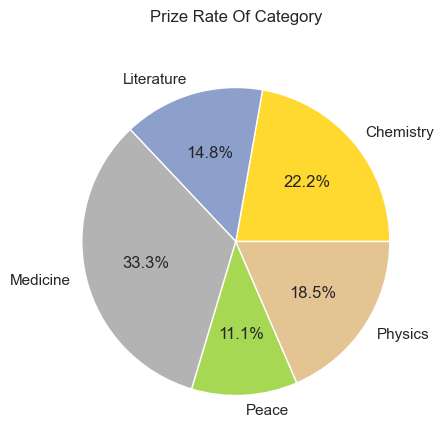

In [70]:
labels = 'Chemistry', 'Literature', 'Medicine', 'Peace','Physics'
sizes = [6,4,9,3,5]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,colors=['#ffd92f', '#8da0cb', '#b3b3b3', '#a6d854', '#e5c494'],autopct='%1.1f%%')
plt.title('Prize Rate Of Category', pad=20)

1938-1945 yılları arasında 27 Nobel ödülü verilmiştir. Ödüller arasında ise Tıp ve Kimya dalının yüksek olduğunu görebiliyoruz.En az sayıda olan barış ödülü ise 1939-40-41-42-43 yıllarında verilmemiştir.

In [71]:
df_category_country=df[(df['year']>='1938-01-01') & (df['year']<='1945-01-01')][['full_name','organization_country']]
df_category_country

,full_name,organization_country
197,Richard Kuhn,Germany
198,Pearl Buck,NaN
199,Corneille Jean François Heymans,Belgium
200,Office international Nansen pour les Réfugiés ...,NaN
201,Enrico Fermi,Italy
202,Adolf Friedrich Johann Butenandt,Germany
203,Leopold Ruzicka,Switzerland
204,Frans Eemil Sillanpää,NaN
205,Gerhard Domagk,Germany
206,Ernest Orlando Lawrence,USA


In [72]:
df_category_country.groupby('organization_country')['full_name'].count().reset_index(name='prize_count')

,organization_country,prize_count
0,Belgium,1
1,Denmark,1
2,Finland,1
3,Germany,4
4,Italy,1
5,Sweden,1
6,Switzerland,1
7,UK,3
8,USA,7


Text(0.5, 1.0, 'Prize Rate Of Country')

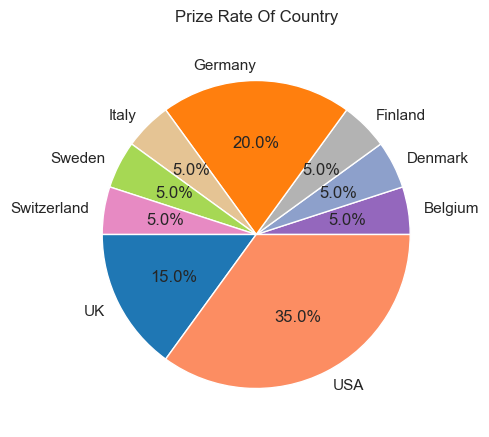

In [73]:
labels = 'Belgium', 'Denmark', 'Finland', 'Germany','Italy','Sweden','Switzerland','UK','USA'
sizes = [1,1,1,4,1,1,1,3,7]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,colors=['#9467bd', '#8da0cb', '#b3b3b3', '#ff7f0e', '#e5c494','#a6d854','#e78ac3','#1f77b4','#fc8d62'],autopct='%1.1f%%')
plt.title('Prize Rate Of Country', pad=15)

1938-1945 yılları arasında ödül kazanan ülkelerin dağılıma baktığımızda ABD'nin öne çıktığını görüyoruz. Zaten bu yıllar ABD'nin ödüllerdeki hakimiyetinin artmaya başladığı tarihlerdir.

## ***Nobel ödüllerinin kategorilerini incelediğimizde barış ve edebiyat kategorisi dışında kalan dallarda organizasyon ülkesi kolonundaki veriler çoğunlukla dolu iken bu iki kategoride bu kolondaki veriler yoktur. Diğer kategoriler için belirli bir çalışma alanı, bilimsel ve ekonomik imkanlar gerekliyken barış ve edebiyat dallarında buna ihtiyaç duyulmadan da ödüller verilebilir. Bu yorumu çıkararak bu iki kategori için sorularda ödül alan kişilerin doğdukları ülke baz alınarak analiz yapılmıştır.

## BARIŞ VE EDEBİYAT KATEGORİSİ İÇİN

In [74]:
df_2=df[((df['year']>='1938-01-01') & (df['year']<='1945-01-01')) & ((df['category']=='Peace') | (df['category']=='Literature'))][['full_name','birth_country']]
df_2

,full_name,birth_country
198,Pearl Buck,USA
200,Office international Nansen pour les Réfugiés ...,NaN
204,Frans Eemil Sillanpää,Finland
212,Johannes Vilhelm Jensen,Denmark
215,Comité international de la Croix Rouge (Intern...,NaN
218,Gabriela Mistral,Chile
222,Cordell Hull,USA


In [75]:
df_2.groupby('birth_country')['full_name'].count().reset_index(name='prize_count')

,birth_country,prize_count
0,Chile,1
1,Denmark,1
2,Finland,1
3,USA,2


Text(0.5, 1.0, 'Peace and Literature Prize Rate Of Country')

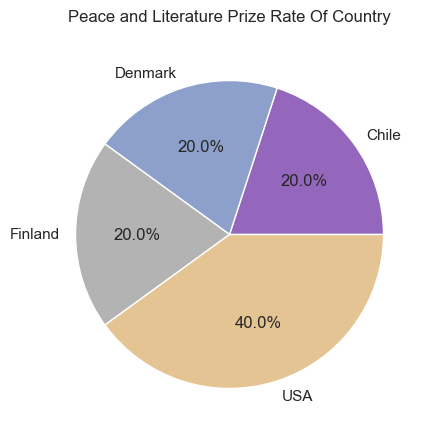

In [76]:
labels = 'Chile','Denmark','Finland','USA'
sizes = [1,1,1,2]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,colors=['#9467bd', '#8da0cb', '#b3b3b3', '#e5c494'],autopct='%1.1f%%')
plt.title('Peace and Literature Prize Rate Of Country', pad=15)

## SORU7: 1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.

In [77]:
df_genel_siralama2=df[(df['year']>='1947-01-01') & (df['year']<='1991-01-01')][['full_name','category','organization_country']]
df_genel_siralama2

,full_name,category,organization_country
232,Sir Robert Robinson,Chemistry,UK
233,André Paul Guillaume Gide,Literature,NaN
234,Carl Ferdinand Cori,Medicine,USA
235,"Gerty Theresa Cori, née Radnitz",Medicine,USA
236,Bernardo Alberto Houssay,Medicine,Argentina
...,...,...,...
615,Nadine Gordimer,Literature,NaN
616,Erwin Neher,Medicine,Federal Republic of Germany
617,Bert Sakmann,Medicine,Federal Republic of Germany
618,Aung San Suu Kyi,Peace,NaN


In [78]:
df_genel_sayi=df_genel_siralama2.groupby('category')['full_name'].count().reset_index(name='prize_count')
df_genel_sayi

,category,prize_count
0,Chemistry,70
1,Economics,31
2,Literature,47
3,Medicine,103
4,Peace,46
5,Physics,91


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Chemistry'),
  Text(1, 0, 'Economics'),
  Text(2, 0, 'Literature'),
  Text(3, 0, 'Medicine'),
  Text(4, 0, 'Peace'),
  Text(5, 0, 'Physics')])

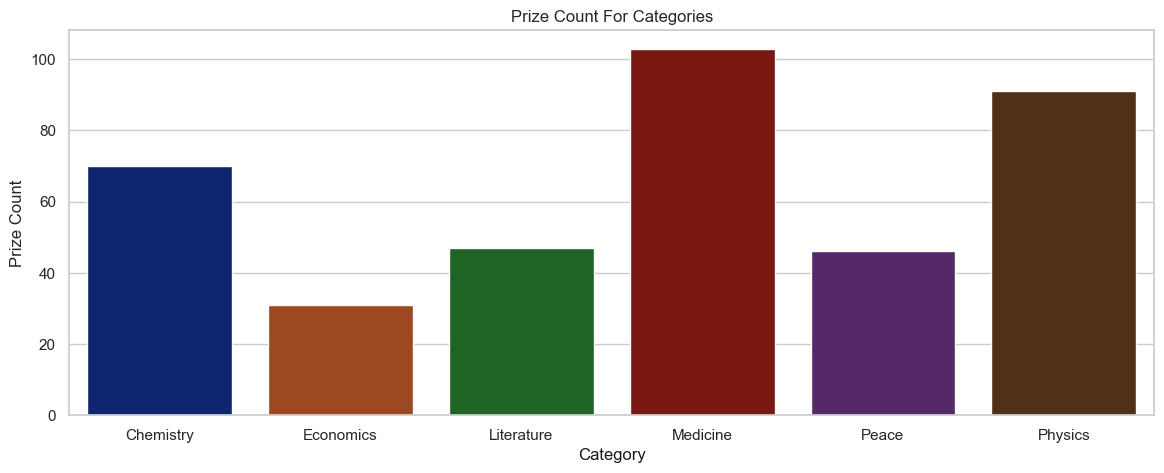

In [79]:
sns.barplot(x='category', y='prize_count', data=df_genel_sayi, palette="dark")
plt.xlabel('Category', color='black', alpha=0.9)
plt.ylabel('Prize Count')
plt.title('Prize Count For Categories')
plt.xticks(rotation=0)

## 1) Kimya

In [80]:
df_category_ch=df[(df['year']>='1947-01-01') & (df['year']<='1991-01-01') & (df['category']=='Chemistry')][['full_name','organization_country']]
df_category_ch

,full_name,organization_country
232,Sir Robert Robinson,UK
240,Arne Wilhelm Kaurin Tiselius,Sweden
244,William Francis Giauque,USA
250,Otto Paul Hermann Diels,Federal Republic of Germany
251,Kurt Alder,Federal Republic of Germany
...,...,...
582,Hartmut Michel,Federal Republic of Germany
592,Sidney Altman,USA
593,Thomas R. Cech,USA
602,Elias James Corey,USA


In [81]:
df_che_soru7=df_category_ch.groupby('organization_country')['full_name'].count().reset_index(name='chemistry_prize_count')
df_che_soru7

,organization_country,chemistry_prize_count
0,Argentina,1
1,Belgium,1
2,Canada,2
3,Czechoslovakia,1
4,Federal Republic of Germany,9
5,France,1
6,Italy,1
7,Japan,1
8,Norway,1
9,Sweden,1


(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

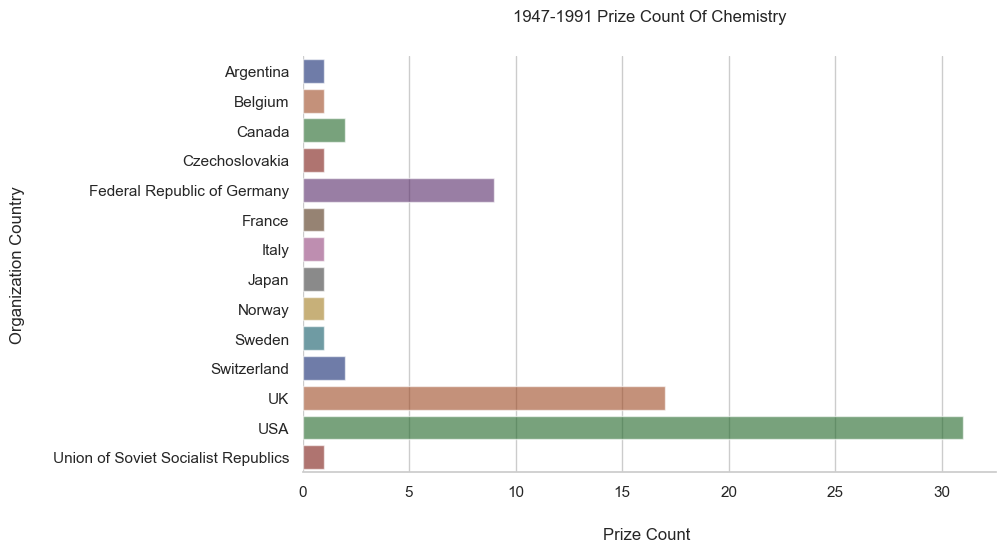

In [82]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_che_soru7, kind="bar",
    x="chemistry_prize_count", y="organization_country",
    palette="dark", alpha=.6, height=5, aspect=2)
g.despine(left=True)
g.set_axis_labels("Prize Count ", "Organization Country", labelpad=20)
plt.title("1947-1991 Prize Count Of Chemistry", pad=25)
plt.xticks(rotation=0)

Nobel ödüllerinde Kimya dalındaki ödüllerin ülkelerine göre dağılımına baktığımızda ABD'nin açık ara önde olduğunu, onu takip eden Birleşik Krallığın ise ABD'nin ödül sayısının yarısında olduğunu görüyoruz.

## 2) Tıp

In [83]:
df_category_med=df[(df['year']>='1947-01-01') & (df['year']<='1991-01-01') & (df['category']=='Medicine')][['full_name','organization_country']]
df_category_med

,full_name,organization_country
234,Carl Ferdinand Cori,USA
235,"Gerty Theresa Cori, née Radnitz",USA
236,Bernardo Alberto Houssay,Argentina
242,Paul Hermann Müller,Switzerland
246,Walter Rudolf Hess,Switzerland
...,...,...
597,Harold E. Varmus,USA
607,Joseph E. Murray,USA
608,E. Donnall Thomas,USA
616,Erwin Neher,Federal Republic of Germany


In [84]:
df_med_soru7=df_category_med.groupby('organization_country')['full_name'].count().reset_index(name='medicine_prize_count')
df_med_soru7

,organization_country,medicine_prize_count
0,Argentina,1
1,Australia,2
2,Austria,1
3,Belgium,1
4,Federal Republic of Germany,5
5,France,4
6,Italy,2
7,Portugal,1
8,Sweden,5
9,Switzerland,6


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

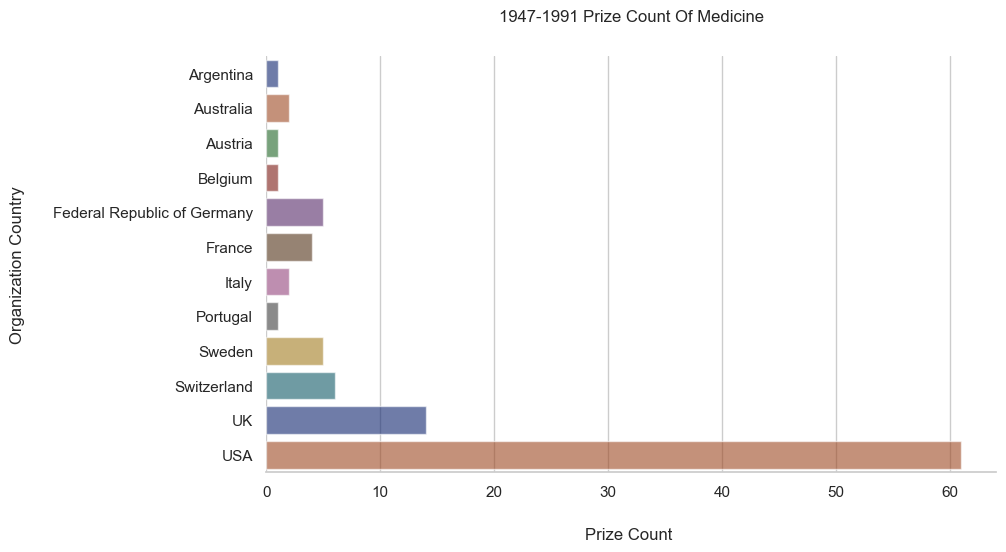

In [85]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_med_soru7, kind="bar",
    x="medicine_prize_count", y="organization_country",
    palette="dark", alpha=.6, height=5, aspect=2)
g.despine(left=True)
g.set_axis_labels("Prize Count ", "Organization Country", labelpad=20)
plt.title("1947-1991 Prize Count Of Medicine", pad=25)
plt.xticks(rotation=0)

Bu dönemde tıp alanında da ABD'nin açık ara ödüllerin çoğunu aldığını görmekteyiz.

### 3) Edebiyat

In [86]:
df[df['category']=='Literature']

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,year_category,age
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900s,62.0
7,1902-01-01,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Germany,Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany,1900s,84.0
14,1903-01-01,Literature,The Nobel Prize in Literature 1903,"""as a tribute to his noble, magnificent and ve...",1/1,572,Individual,Bjørnstjerne Martinus Bjørnson,1832-12-08,Kvikne,Norway,Male,NaN,NaN,NaN,1910-04-26,Paris,France,1900s,70.0
21,1904-01-01,Literature,The Nobel Prize in Literature 1904,"""in recognition of the fresh originality and t...",1/2,573,Individual,Frédéric Mistral,1830-09-08,Maillane,France,Male,NaN,NaN,NaN,1914-03-25,Maillane,France,1900s,73.0
22,1904-01-01,Literature,The Nobel Prize in Literature 1904,"""in recognition of the numerous and brilliant ...",1/2,574,Individual,José Echegaray y Eizaguirre,1832-04-19,Madrid,Spain,Male,NaN,NaN,NaN,1916-09-04,Madrid,Spain,1900s,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,2012-01-01,Literature,The Nobel Prize in Literature 2012,"""who with hallucinatory realism merges folk ta...",1/1,880,Individual,Mo Yan,1955-02-02,Gaomi,China,Male,NaN,NaN,NaN,NaT,NaN,NaN,2010s,57.0
869,2013-01-01,Literature,The Nobel Prize in Literature 2013,"""master of the contemporary short story""",1/1,892,Individual,Alice Munro,1931-07-10,Wingham,Canada,Female,NaN,NaN,NaN,NaT,NaN,NaN,2010s,82.0
880,2014-01-01,Literature,The Nobel Prize in Literature 2014,"""for the art of memory with which he has evoke...",1/1,912,Individual,Patrick Modiano,1945-07-30,Paris,France,Male,NaN,NaN,NaN,NaT,NaN,NaN,2010s,68.0
893,2015-01-01,Literature,The Nobel Prize in Literature 2015,"""for her polyphonic writings, a monument to su...",1/1,924,Individual,Svetlana Alexievich,1948-05-31,Ivano-Frankivsk,Ukraine,Female,NaN,NaN,NaN,NaT,NaN,NaN,2010s,67.0


In [87]:
from matplotlib.ticker import MaxNLocator

In [88]:
df_category_lit=df[(df['year']>='1947-01-01') & (df['year']<='1991-01-01') & (df['category']=='Literature')][['full_name','birth_country']]
df_category_lit

,full_name,birth_country
233,André Paul Guillaume Gide,France
241,Thomas Stearns Eliot,USA
245,William Faulkner,USA
252,Earl (Bertrand Arthur William) Russell,UK
260,Pär Fabian Lagerkvist,Sweden
267,François Mauriac,France
273,Sir Winston Leonard Spencer Churchill,UK
279,Ernest Miller Hemingway,USA
287,Halldór Kiljan Laxness,Iceland
293,Juan Ramón Jiménez,Spain


In [89]:
df_lit_soru7=df_category_lit.groupby('birth_country')['full_name'].count().reset_index(name='literature_prize_count')
df_lit_soru7

,birth_country,literature_prize_count
0,Algeria,1
1,Bosnia and Herzegovina,1
2,Bulgaria,1
3,Canada,1
4,Chile,1
5,Colombia,1
6,Czechia,1
7,Egypt,1
8,France,3
9,Germany,2


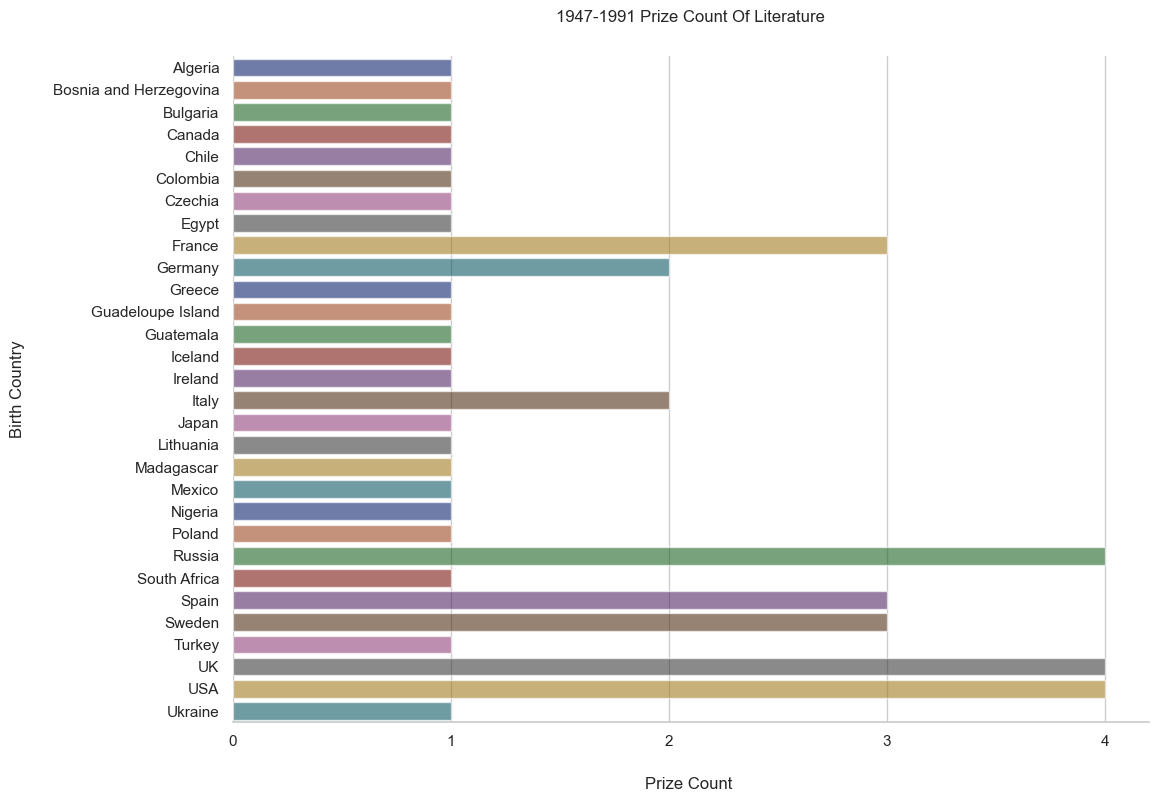

In [90]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_lit_soru7, kind="bar",
    x="literature_prize_count", y="birth_country",
    palette="dark", alpha=.6, height=5, aspect=2)
g.despine(left=True)
g.set_axis_labels("Prize Count ", "Birth Country", labelpad=20)
plt.title("1947-1991 Prize Count Of Literature", pad=25)
plt.xticks(rotation=0)
g.fig.set_size_inches(12, 8) 
ax = g.ax
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

Diğer kategorilerde belirli gelişmiş ülkeler arasında ödüller paylaşılırken edebiyat alanında ülke sayısının arttığını gözlemliyoruz.

## 4) Barış

In [91]:
df_category_peace=df[(df['year']>='1947-01-01') & (df['year']<='1991-01-01') & (df['category']=='Peace')][['full_name','birth_country']]
df_category_peace

,full_name,birth_country
237,Friends Service Council (The Quakers),NaN
238,American Friends Service Committee (The Quakers),NaN
248,Lord (John) Boyd Orr of Brechin,Scotland
256,Ralph Bunche,USA
262,Léon Jouhaux,France
269,Albert Schweitzer,France
276,George Catlett Marshall,USA
283,Office of the United Nations High Commissioner...,NaN
303,Lester Bowles Pearson,Canada
311,Georges Pire,Belgium


In [92]:
df_pea_soru7=df_category_peace.groupby('birth_country')['full_name'].count().reset_index(name='peace_prize_count')
df_pea_soru7

,birth_country,peace_prize_count
0,Argentina,1
1,Belarus,1
2,Belgium,1
3,Canada,1
4,China,1
5,Costa Rica,1
6,Egypt,1
7,France,4
8,Germany,2
9,Japan,1


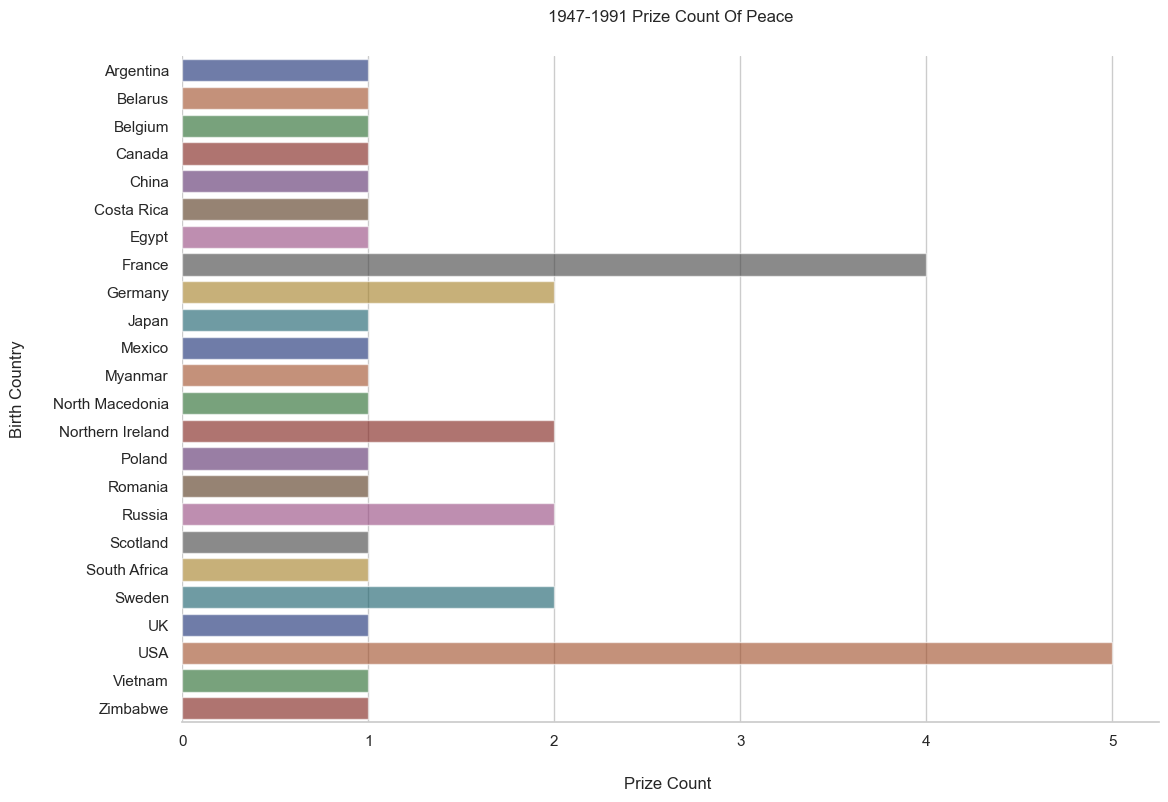

In [93]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_pea_soru7, kind="bar",
    x="peace_prize_count", y="birth_country",
    palette="dark", alpha=.6, height=5, aspect=2)
g.despine(left=True)
g.set_axis_labels("Prize Count ", "Birth Country", labelpad=20)
plt.title("1947-1991 Prize Count Of Peace", pad=25)
plt.xticks(rotation=0)
g.fig.set_size_inches(12, 8) 
ax = g.ax
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

Edebiyat kategorisinde olduğu gibi barış dalında da ülke çeşitlilğin fazla olduğunu görmekteyiz.

## 5) Fizik

In [94]:
df_category_physics=df[(df['year']>='1947-01-01') & (df['year']<='1991-01-01') & (df['category']=='Physics')][['full_name','organization_country']]
df_category_physics

,full_name,organization_country
239,Sir Edward Victor Appleton,UK
243,Patrick Maynard Stuart Blackett,UK
249,Hideki Yukawa,Japan
257,Cecil Frank Powell,UK
263,Sir John Douglas Cockcroft,UK
...,...,...
601,Wolfgang Paul,Federal Republic of Germany
610,Jerome I. Friedman,USA
611,Henry W. Kendall,USA
612,Richard E. Taylor,USA


In [95]:
df_phy_soru7=df_category_physics.groupby('organization_country')['full_name'].count().reset_index(name='physics_prize_count')
df_phy_soru7

,organization_country,physics_prize_count
0,Denmark,2
1,Federal Republic of Germany,6
2,France,3
3,Ireland,1
4,Italy,1
5,Japan,2
6,Netherlands,1
7,Sweden,2
8,Switzerland,7
9,UK,10


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

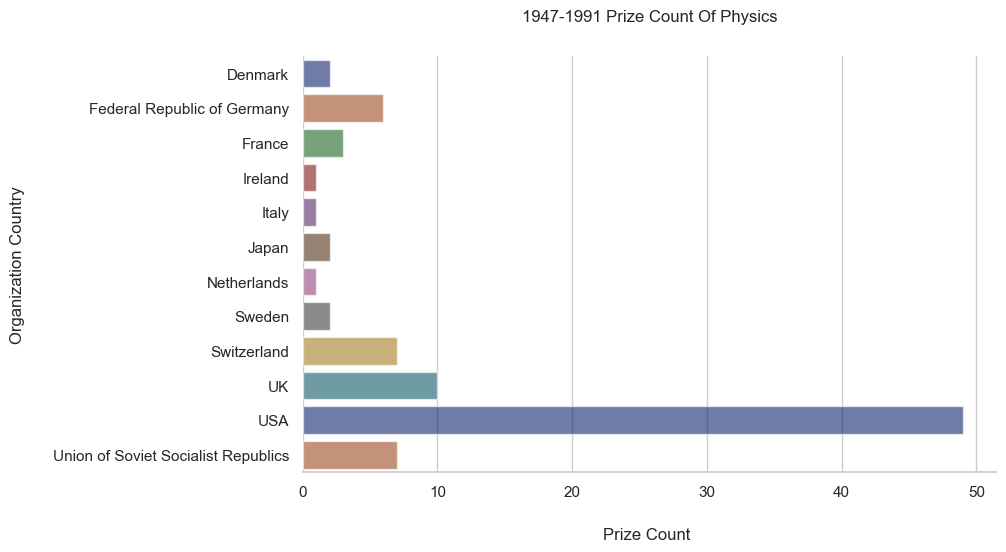

In [96]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_phy_soru7, kind="bar",
    x="physics_prize_count", y="organization_country",
    palette="dark", alpha=.6, height=5, aspect=2)
g.despine(left=True)
g.set_axis_labels("Prize Count ", "Organization Country", labelpad=20)
plt.title("1947-1991 Prize Count Of Physics", pad=25)
plt.xticks(rotation=0)

ABD,soğuk savaş dönemine denk gelen bu yıllarda İkinci Dünya savaşında kullandığı atom bombası ve sonrasında SSCB ile girilen yarıştan dolayı nükleer ve atom fiziği alanındaki çalışmaları arttırmıştır. Çoğunlukla da bu alandaki çalışmalara nobel ödülleri verilmiştir.

## 6) Ekonomi

In [97]:
df_category_eco=df[(df['year']>='1947-01-01') & (df['year']<='1991-01-01') & (df['category']=='Economics')][['full_name','organization_country']]
df_category_eco

,full_name,organization_country
393,Ragnar Frisch,Norway
394,Jan Tinbergen,Netherlands
402,Paul A. Samuelson,USA
411,Simon Kuznets,USA
419,John R. Hicks,UK
420,Kenneth J. Arrow,USA
429,Wassily Leontief,USA
440,Gunnar Myrdal,NaN
441,Friedrich August von Hayek,NaN
453,Leonid Vitaliyevich Kantorovich,Union of Soviet Socialist Republics


In [98]:
df_eco_soru7=df_category_eco.groupby('organization_country')['full_name'].count().reset_index(name='economics_prize_count')
df_eco_soru7

,organization_country,economics_prize_count
0,France,1
1,Netherlands,1
2,Norway,2
3,Sweden,1
4,UK,3
5,USA,20
6,Union of Soviet Socialist Republics,1


In [99]:
from matplotlib.ticker import MaxNLocator

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20')]

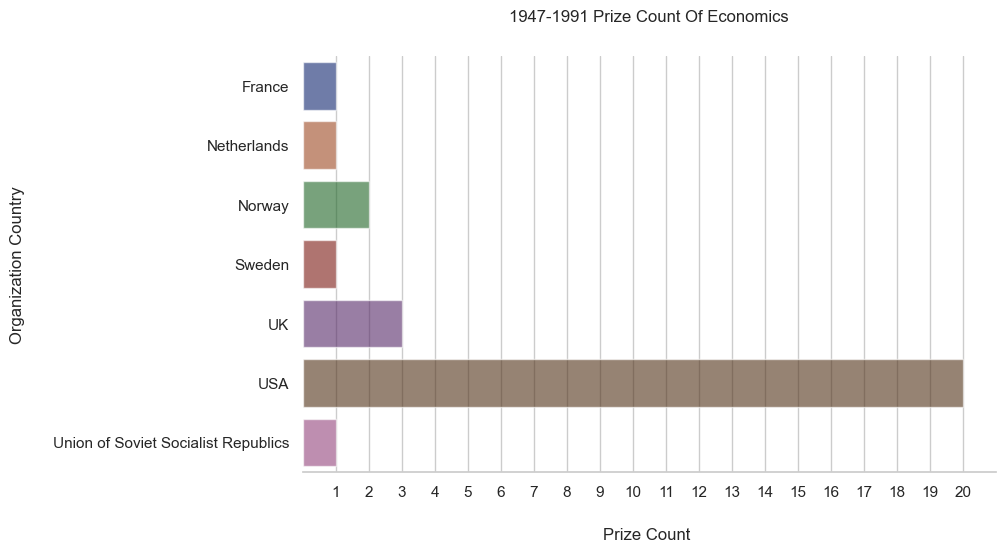

In [100]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_eco_soru7, kind="bar",
    x="economics_prize_count", y="organization_country",
    palette="dark", alpha=.6, height=5, aspect=2)
g.despine(left=True)
g.set_axis_labels("Prize Count ", "Organization Country", labelpad=20)
plt.title("1947-1991 Prize Count Of Economics", pad=25)
plt.xticks(rotation=0)
ax = g.ax
ax.set_xticks(range(int(df_eco_soru7["economics_prize_count"].min()), 
                    int(df_eco_soru7["economics_prize_count"].max()) + 1))
ax.set_xticklabels(range(int(df_eco_soru7["economics_prize_count"].min()), 
                         int(df_eco_soru7["economics_prize_count"].max()) + 1))

1960'lı yıllarda verilmeye başlanan ekonomi ödüllerinde ise yine ABD ön plana çıkmaktadır.

### SORU8: Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir)

In [101]:
df[(df['year']>'2000-01-01') & ~(df['category']== 'Economics')][['full_name','organization_country','category','age']]

,full_name,organization_country,category,age
719,William S. Knowles,USA,Chemistry,84.0
720,Ryoji Noyori,Japan,Chemistry,62.0
721,K. Barry Sharpless,USA,Chemistry,60.0
725,Sir Vidiadhar Surajprasad Naipaul,NaN,Literature,68.0
726,Leland H. Hartwell,USA,Medicine,61.0
...,...,...,...,...
906,Yoshinori Ohsumi,Japan,Medicine,71.0
907,Juan Manuel Santos,NaN,Peace,64.0
908,David J. Thouless,USA,Physics,81.0
909,F. Duncan M. Haldane,USA,Physics,64.0


In [102]:
df_2000_sonrası=df[df['year']>'2000-01-01']
df_2000_sonrası

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,year_category,age
719,2001-01-01,Chemistry,The Nobel Prize in Chemistry 2001,"""for their work on chirally catalysed hydrogen...",1/4,741,Individual,William S. Knowles,1917-06-01,"Taunton, MA",USA,Male,NaN,"St. Louis, MO",USA,2012-06-13,"Chesterfield, MO",United States of America,2000s,84.0
720,2001-01-01,Chemistry,The Nobel Prize in Chemistry 2001,"""for their work on chirally catalysed hydrogen...",1/4,742,Individual,Ryoji Noyori,1938-09-03,Kobe,Japan,Male,Nagoya University,Nagoya,Japan,NaT,NaN,NaN,2000s,62.0
721,2001-01-01,Chemistry,The Nobel Prize in Chemistry 2001,"""for his work on chirally catalysed oxidation ...",1/2,743,Individual,K. Barry Sharpless,1941-04-28,"Philadelphia, PA",USA,Male,The Scripps Research Institute,"La Jolla, CA",USA,NaT,NaN,NaN,2000s,60.0
722,2001-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analyses of markets with asymmetric...",1/3,744,Individual,George A. Akerlof,1940-06-17,"New Haven, CT",USA,Male,University of California,"Berkeley, CA",USA,NaT,NaN,NaN,2000s,61.0
723,2001-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analyses of markets with asymmetric...",1/3,745,Individual,A. Michael Spence,1943-01-01,"Montclair, NJ",USA,Male,Stanford University,"Stanford, CA",USA,NaT,NaN,NaN,2000s,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaT,NaN,NaN,2010s,71.0
907,2016-01-01,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaT,NaN,NaN,2010s,64.0
908,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,UK,Male,University of Washington,"Seattle, WA",USA,NaT,NaN,NaN,2010s,81.0
909,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,UK,Male,Princeton University,"Princeton, NJ",USA,NaT,NaN,NaN,2010s,64.0


In [103]:
df_2000=df_2000_sonrası.groupby('category')['prize'].count().reset_index()
df_2000

,category,prize
0,Chemistry,40
1,Economics,32
2,Literature,16
3,Medicine,39
4,Peace,23
5,Physics,42


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Chemistry'),
  Text(1, 0, 'Economics'),
  Text(2, 0, 'Literature'),
  Text(3, 0, 'Medicine'),
  Text(4, 0, 'Peace'),
  Text(5, 0, 'Physics')])

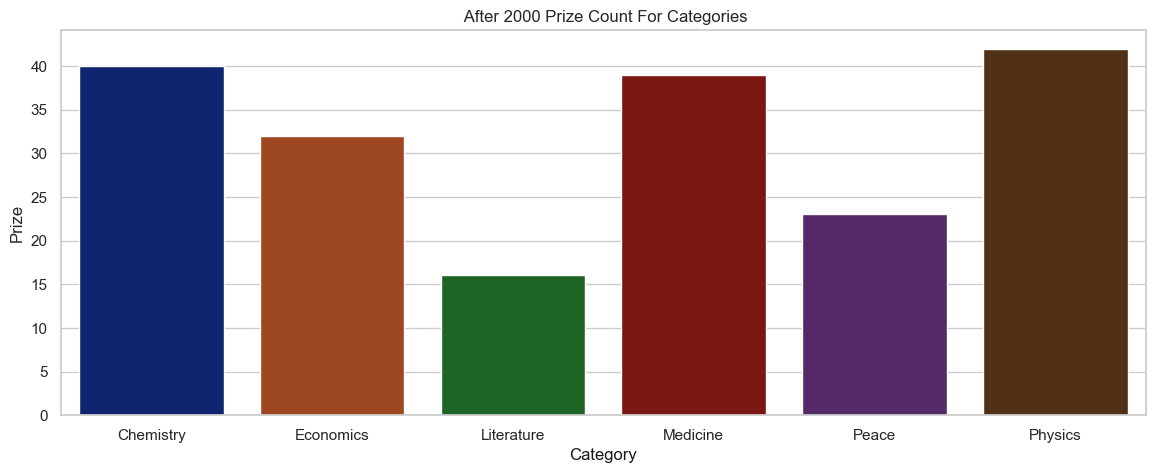

In [104]:
sns.barplot(x='category', y='prize', data=df_2000, palette="dark")
plt.xlabel('Category',color='black', alpha=0.9)
plt.ylabel('Prize') 
plt.title(' After 2000 Prize Count For Categories')
plt.xticks(rotation=0)

## 1) Kimya

In [114]:
chemistry_2000_sonrası=df[(df['year']>'2000-01-01') & (df['category']== 'Chemistry')][['full_name','organization_country', 'age']]
chemistry_2000_sonrası

,full_name,organization_country,age
719,William S. Knowles,USA,84.0
720,Ryoji Noyori,Japan,62.0
721,K. Barry Sharpless,USA,60.0
734,John B. Fenn,USA,85.0
735,Koichi Tanaka,Japan,42.0
736,Kurt Wüthrich,Switzerland,63.0
747,Peter Agre,USA,54.0
748,Roderick MacKinnon,USA,47.0
758,Aaron Ciechanover,Israel,56.0
759,Avram Hershko,Israel,66.0


Text(0.5, 1.0, 'Age Range For Chemistry Prize')

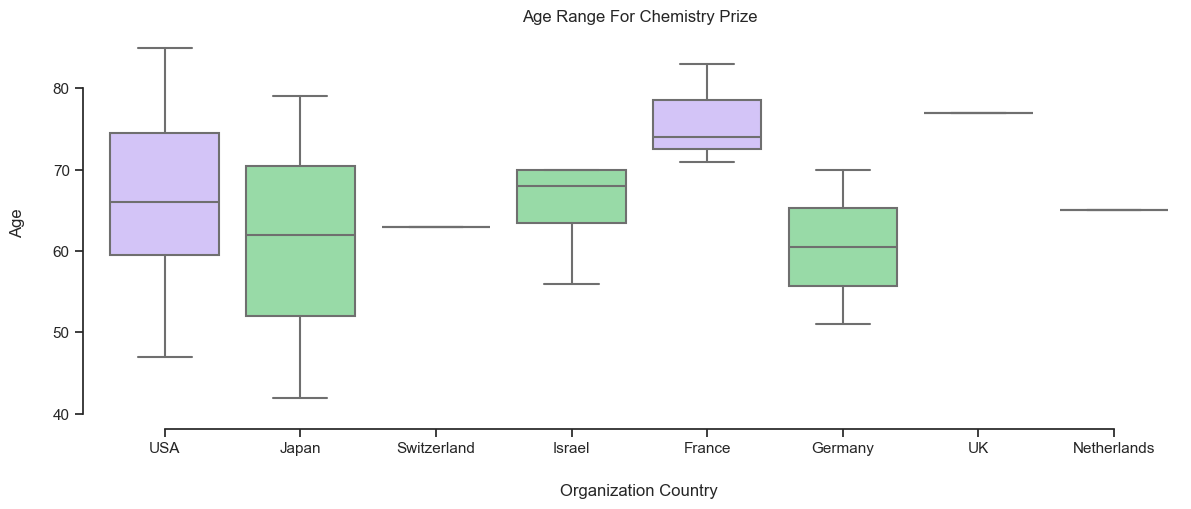

In [115]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="organization_country", y="age",
            palette=["m", "g"],
            data=chemistry_2000_sonrası)
sns.despine(offset=10, trim=True)
plt.xlabel("Organization Country", labelpad=20)
plt.ylabel("Age", labelpad=20)
plt.title('Age Range For Chemistry Prize')



2000 sonrasında Kimya dalında ödül kazananların yaşlarına ülkelere göre gruplandırıp baktığımızda ABD ve Japonya'da yaş aralığının fazla olduğunu görmekteyiz.

In [119]:
df_che_country=chemistry_2000_sonrası.groupby('organization_country')['full_name'].count().reset_index(name='prize_count')
df_che_country

,organization_country,prize_count
0,France,3
1,Germany,2
2,Israel,4
3,Japan,3
4,Netherlands,1
5,Switzerland,1
6,UK,2
7,USA,23


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'France'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Israel'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'Switzerland'),
  Text(6, 0, 'UK'),
  Text(7, 0, 'USA')])

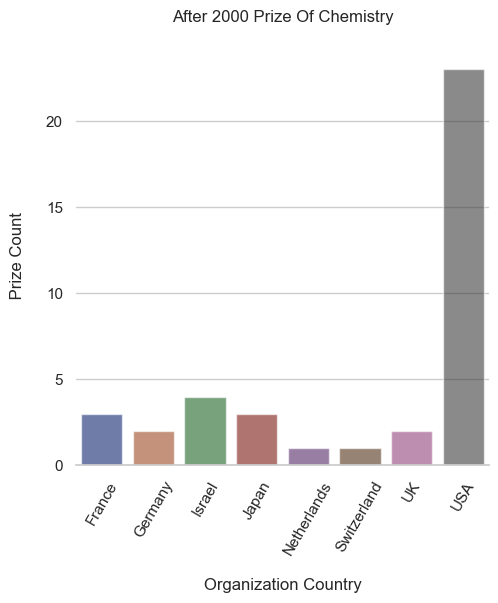

In [120]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_che_country, kind="bar",
    x="organization_country", y="prize_count",
    palette="dark", alpha=.6, height=5)
g.despine(left=True)
g.set_axis_labels('Organization Country'," Prize Count"  ,labelpad=15)
plt.title("After 2000 Prize Of Chemistry", pad=20)
plt.xticks(rotation=60)

## 2) Edebiyat

In [121]:
literature_2000_sonrası=df[(df['year']>'2000-01-01') & (df['category']== 'Literature')][['full_name','birth_country', 'age']]
literature_2000_sonrası

,full_name,birth_country,age
725,Sir Vidiadhar Surajprasad Naipaul,Trinidad,68.0
739,Imre Kertész,Hungary,72.0
751,John M. Coetzee,South Africa,63.0
763,Elfriede Jelinek,Austria,57.0
775,Harold Pinter,UK,74.0
785,Orhan Pamuk,Turkey,54.0
796,Doris Lessing,Iran,87.0
808,Jean-Marie Gustave Le Clézio,France,68.0
821,Herta Müller,Romania,55.0
835,Mario Vargas Llosa,Peru,74.0


Text(0.5, 1.0, 'Age Range For Literature Prize')

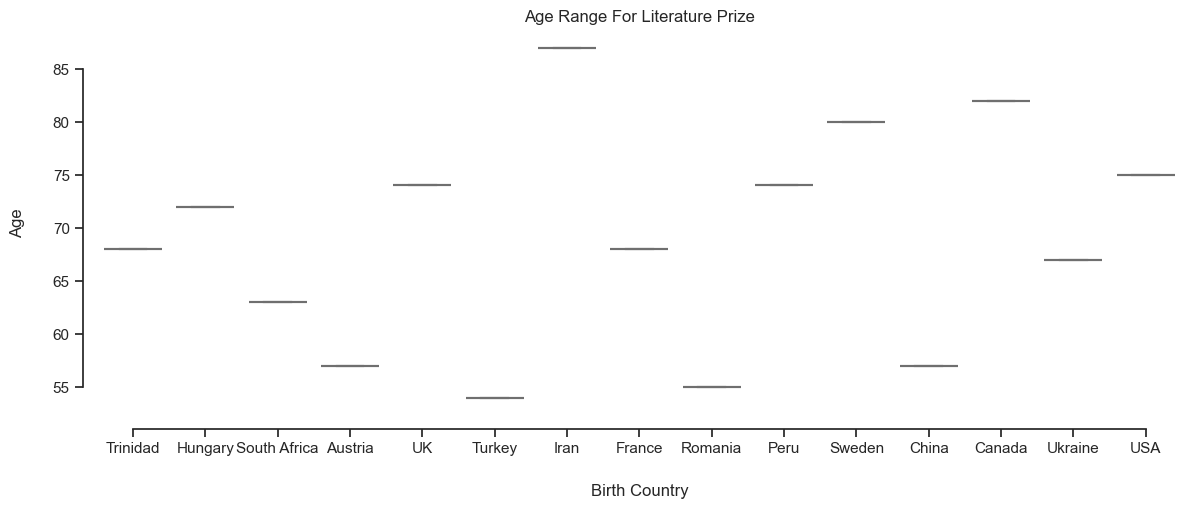

In [122]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="birth_country", y="age",
            palette=["m", "g"],
            data=literature_2000_sonrası)
sns.despine(offset=10, trim=True)
plt.xlabel("Birth Country", labelpad=20)
plt.ylabel("Age", labelpad=20)
plt.title('Age Range For Literature Prize')

Edebiyat alanında ise ödül kazanan ülkelerin çeşitliğinin fazla olduğunu ve ve çoğunlukla da bu ülkelerden birer kişinin ödül kazandığını görüyoruz. Bu yüzden bir yaş aralığı oluşmamıştır, ödül kazan her kişinin yaşı tabloda gösterilmiştir.

In [124]:
df_lit_country=literature_2000_sonrası.groupby('birth_country')['full_name'].count().reset_index(name='prize_count')
df_lit_country

,birth_country,prize_count
0,Austria,1
1,Canada,1
2,China,1
3,France,2
4,Hungary,1
5,Iran,1
6,Peru,1
7,Romania,1
8,South Africa,1
9,Sweden,1


[Text(0, 0, '0'),
 Text(0, 1, '1'),
 Text(0, 2, '2'),
 Text(0, 3, '3'),
 Text(0, 4, '4'),
 Text(0, 5, '5'),
 Text(0, 6, '6'),
 Text(0, 7, '7'),
 Text(0, 8, '8'),
 Text(0, 9, '9'),
 Text(0, 10, '10')]

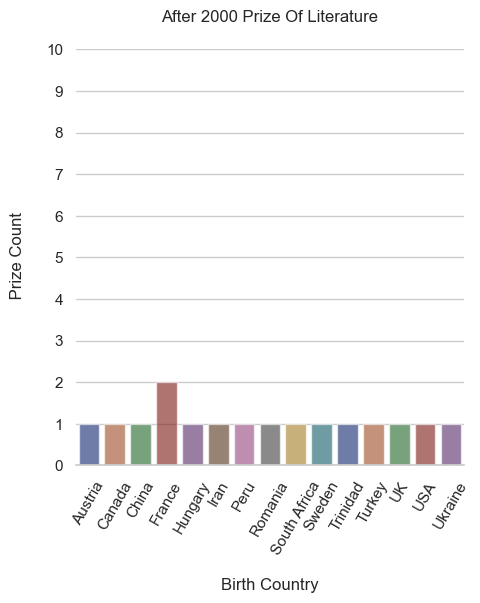

In [125]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_lit_country, kind="bar",
    x="birth_country", y="prize_count",
    palette="dark", alpha=.6, height=5)
g.despine(left=True)
g.set_axis_labels('Birth Country'," Prize Count"  ,labelpad=15)
plt.title("After 2000 Prize Of Literature", pad=20)
plt.xticks(rotation=60)
ax = g.ax
ax.set_yticks(range(0, 11)) 
ax.set_yticklabels(range(0, 11))


## 3) Barış

In [126]:
peace_2000_sonrası=df[(df['year']>'2000-01-01') & (df['category']== 'Peace')][['full_name','birth_country', 'age']]
peace_2000_sonrası

,full_name,birth_country,age
729,United Nations (U.N.),NaN,NaN
730,Kofi Annan,Ghana,63.0
743,Jimmy Carter,USA,77.0
754,Shirin Ebadi,Iran,56.0
766,Wangari Muta Maathai,Kenya,64.0
778,International Atomic Energy Agency (IAEA),NaN,NaN
779,Mohamed ElBaradei,Egypt,63.0
788,Muhammad Yunus,Bangladesh,66.0
789,Grameen Bank,NaN,NaN
800,Intergovernmental Panel on Climate Change (IPCC),NaN,NaN


Text(0.5, 1.0, 'Age Range For Peace Prize')

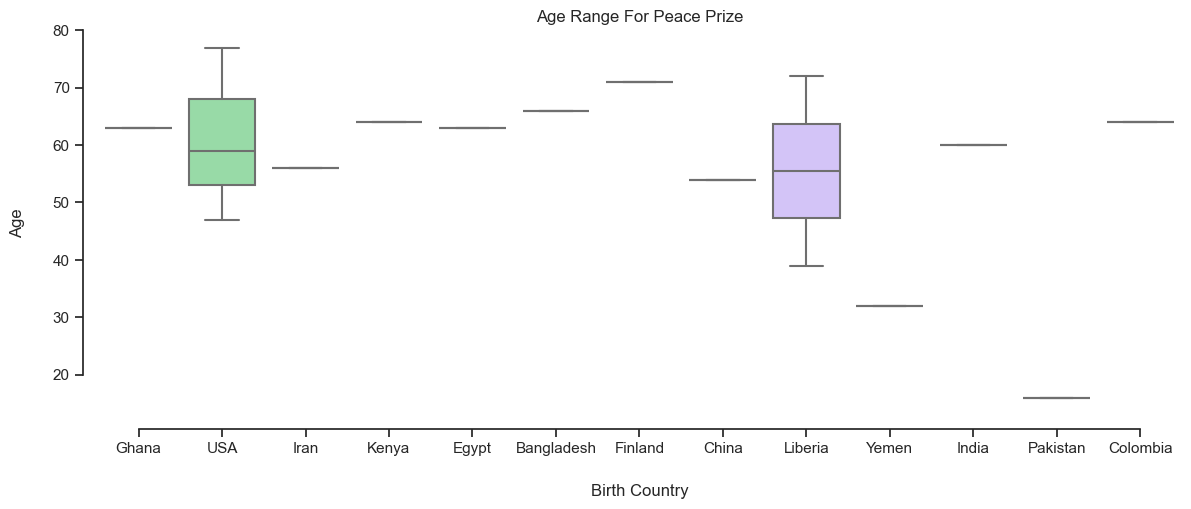

In [127]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="birth_country", y="age",
            palette=["m", "g"],
            data=peace_2000_sonrası)
sns.despine(offset=10, trim=True)
plt.xlabel("Birth Country", labelpad=20)
plt.ylabel("Age", labelpad=20)
plt.title('Age Range For Peace Prize')

Barış kategorisinde de ülke çeşitliliğinin fazla olduğunu birden fazla ödül alan ülkelerin ise ABD ve Liberya olduğunu görüyoruz. En genç nobel sahibi kişinin de yine bu kategoride Pakistan'dan olduğu tabloda görülmektedir.

In [128]:
df_peace_country=peace_2000_sonrası.groupby('birth_country')['full_name'].count().reset_index(name='prize_count')
df_peace_country

,birth_country,prize_count
0,Bangladesh,1
1,China,1
2,Colombia,1
3,Egypt,1
4,Finland,1
5,Ghana,1
6,India,1
7,Iran,1
8,Kenya,1
9,Liberia,2


[Text(0, 0, '0'),
 Text(0, 1, '1'),
 Text(0, 2, '2'),
 Text(0, 3, '3'),
 Text(0, 4, '4'),
 Text(0, 5, '5'),
 Text(0, 6, '6'),
 Text(0, 7, '7'),
 Text(0, 8, '8'),
 Text(0, 9, '9'),
 Text(0, 10, '10')]

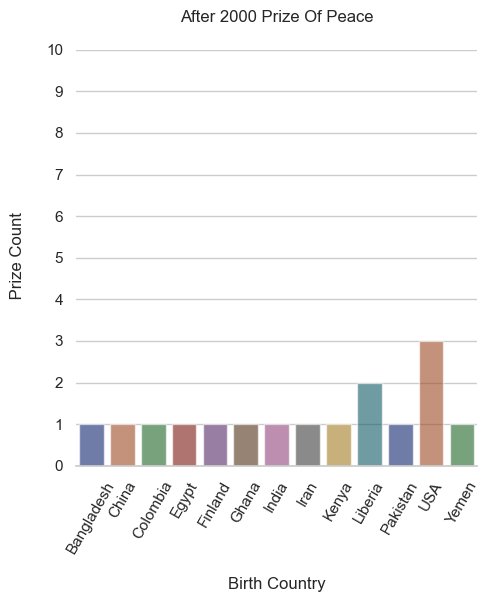

In [129]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_peace_country, kind="bar",
    x="birth_country", y="prize_count",
    palette="dark", alpha=.6, height=5)
g.despine(left=True)
g.set_axis_labels('Birth Country'," Prize Count"  ,labelpad=15)
plt.title("After 2000 Prize Of Peace", pad=20)
plt.xticks(rotation=60)
ax = g.ax
ax.set_yticks(range(0, 11)) 
ax.set_yticklabels(range(0, 11))

## 4) Fizik

In [130]:
Physics_2000_sonrası=df[(df['year']>'2000-01-01') & (df['category']== 'Physics')][['full_name','organization_country', 'age']]
Physics_2000_sonrası

,full_name,organization_country,age
731,Eric A. Cornell,USA,39.0
732,Wolfgang Ketterle,USA,43.0
733,Carl E. Wieman,USA,50.0
744,Raymond Davis Jr.,USA,87.0
745,Masatoshi Koshiba,Japan,75.0
746,Riccardo Giacconi,USA,70.0
755,Alexei A. Abrikosov,USA,75.0
756,Vitaly L. Ginzburg,Russia,86.0
757,Anthony J. Leggett,USA,65.0
767,David J. Gross,USA,63.0


Text(0.5, 1.0, 'Age Range For Physics Prize')

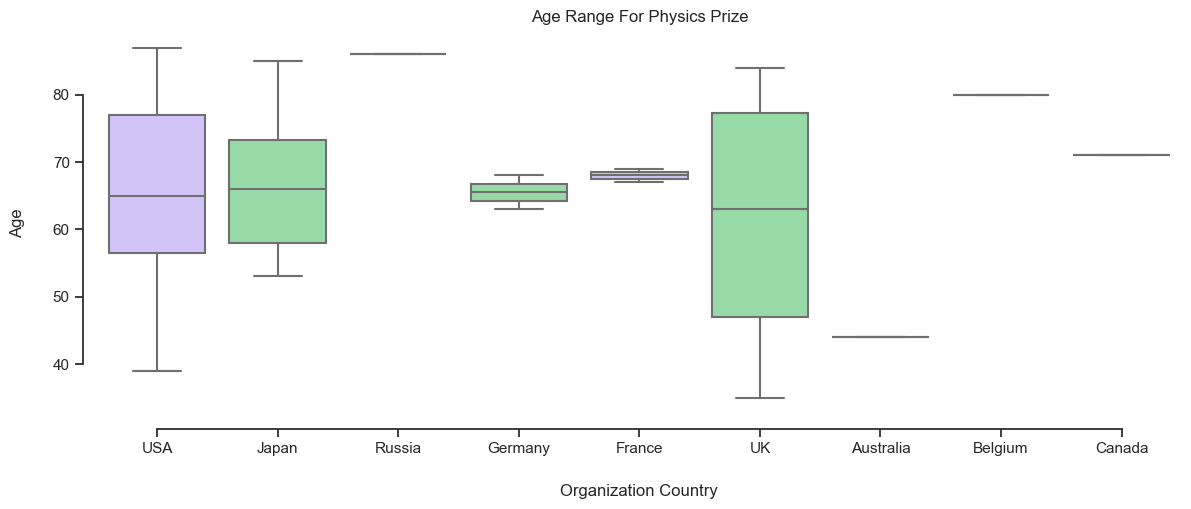

In [131]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="organization_country", y="age",
            palette=["m", "g"],
            data=Physics_2000_sonrası)
sns.despine(offset=10, trim=True)
plt.xlabel("Organization Country", labelpad=20)
plt.ylabel("Age", labelpad=20)
plt.title('Age Range For Physics Prize')


Fizik alanında yaş aralığının en geniş olduğu ilk ülke Birleşik Krallık olurken en fazla ödül kazanan ABD ise ikinci sıradadır.

In [148]:
df_phy_country=Physics_2000_sonrası.groupby('organization_country')['full_name'].count().reset_index(name='prize_count')
df_phy_country

,organization_country,prize_count
0,Australia,1
1,Belgium,1
2,Canada,1
3,France,2
4,Germany,2
5,Japan,6
6,Russia,1
7,UK,4
8,USA,24


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Belgium'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Russia'),
  Text(7, 0, 'UK'),
  Text(8, 0, 'USA')])

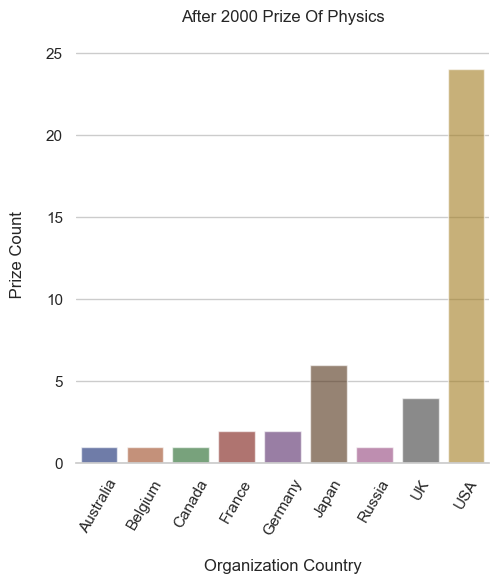

In [149]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_phy_country, kind="bar",
    x="organization_country", y="prize_count",
    palette="dark", alpha=.6, height=5)
g.despine(left=True)
g.set_axis_labels('Organization Country'," Prize Count"  ,labelpad=15)
plt.title("After 2000 Prize Of Physics", pad=20)
plt.xticks(rotation=60)

## 5) Tıp

In [150]:
medicine_2000_sonrası=df[(df['year']>'2000-01-01') & (df['category']== 'Medicine')][['full_name','organization_country', 'age']]
medicine_2000_sonrası

,full_name,organization_country,age
726,Leland H. Hartwell,USA,61.0
727,Tim Hunt,UK,58.0
728,Sir Paul M. Nurse,UK,52.0
740,Sydney Brenner,USA,75.0
741,H. Robert Horvitz,USA,55.0
742,John E. Sulston,UK,60.0
752,Paul C. Lauterbur,USA,74.0
753,Sir Peter Mansfield,UK,69.0
764,Richard Axel,USA,58.0
765,Linda B. Buck,USA,57.0


Text(0.5, 1.0, 'Age Range For Medicine Prize')

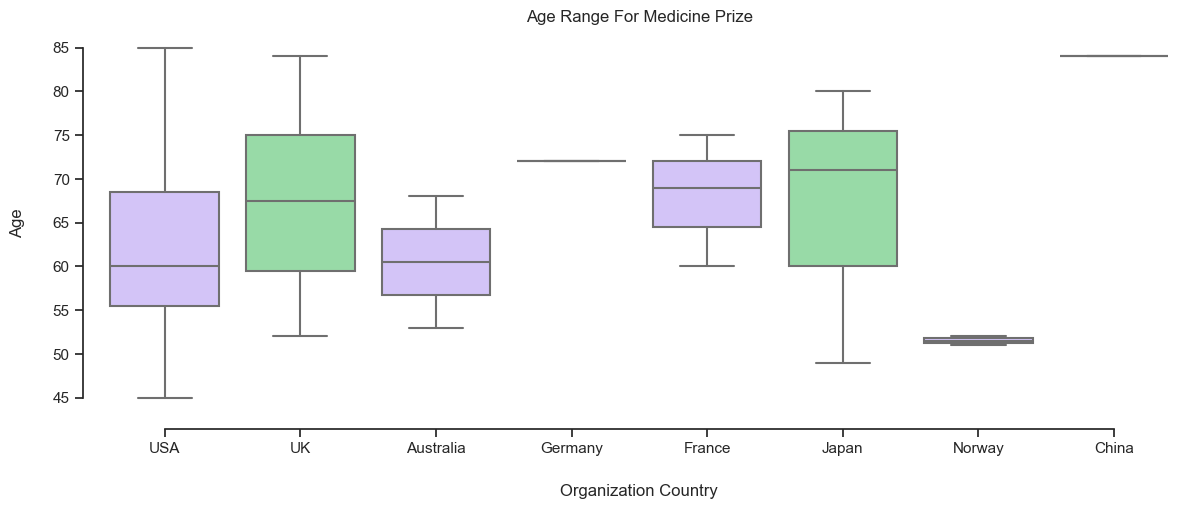

In [151]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="organization_country", y="age",
            palette=["m", "g"],
            data=medicine_2000_sonrası)
sns.despine(offset=10, trim=True)
plt.xlabel("Organization Country", labelpad=20)
plt.ylabel("Age", labelpad=20)
plt.title('Age Range For Medicine Prize')

Tıp alanında yaş aralığının ABD'de fazla olduğunu ve verinin içersinde maksimum yaşa yakın olan değerlerin de bulunduğunu görmekteyiz.

In [152]:
df_med_country=medicine_2000_sonrası.groupby('organization_country')['full_name'].count().reset_index(name='prize_count')
df_med_country

,organization_country,prize_count
0,Australia,2
1,China,1
2,France,3
3,Germany,1
4,Japan,3
5,Norway,2
6,UK,8
7,USA,19


[Text(0, 1, '1'),
 Text(0, 2, '2'),
 Text(0, 3, '3'),
 Text(0, 4, '4'),
 Text(0, 5, '5'),
 Text(0, 6, '6'),
 Text(0, 7, '7'),
 Text(0, 8, '8'),
 Text(0, 9, '9'),
 Text(0, 10, '10'),
 Text(0, 11, '11'),
 Text(0, 12, '12'),
 Text(0, 13, '13'),
 Text(0, 14, '14'),
 Text(0, 15, '15'),
 Text(0, 16, '16'),
 Text(0, 17, '17'),
 Text(0, 18, '18'),
 Text(0, 19, '19'),
 Text(0, 20, '20')]

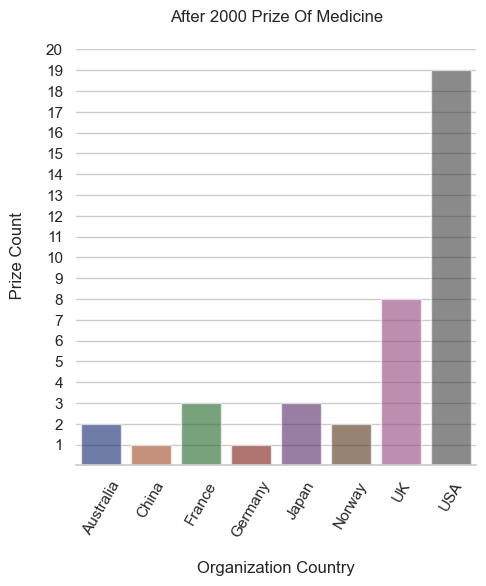

In [153]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_med_country, kind="bar",
    x="organization_country", y="prize_count",
    palette="dark", alpha=.6, height=5)
g.despine(left=True)
g.set_axis_labels('Organization Country'," Prize Count"  ,labelpad=15)
plt.title("After 2000 Prize Of Medicine", pad=20)
plt.xticks(rotation=60)
ax = g.ax
ax.set_yticks(range(int(df_eco_soru7["economics_prize_count"].min()), 
                    int(df_eco_soru7["economics_prize_count"].max()) + 1))
ax.set_yticklabels(range(int(df_eco_soru7["economics_prize_count"].min()), 
                         int(df_eco_soru7["economics_prize_count"].max()) + 1))
